# Tornadoes [1950-2022]

Source: https://www.kaggle.com/datasets/sujaykapadnis/tornados



### Scenario:
- We are hired by NOAA to investigate the US tornadic activity from historical data, from 1950 to today.

### Objectives:
- Understand the historical trends of tornadoes. This includes examination of qualities such as severity, duration, and geographical area affected.
- Determine how these qualities have changed over time by comparing old figures to those from present day.
- Make statement(s) about the pattern(s) in tornadic activity we find. We hope to use any found information to make recommendations for next steps in more robust efforts to quantify future expectations of tornadic activity, such as predictive modeling and forecasting.  
- 
-

### Questions:
1. **Tornado severity**
- Has the length of paths changed? (look at both the average, and median)
- Has the severity (on F/EF scale) changed?

2. **Tornado freqency**
- Has tornado frequency increased over time?
- Has the freqency of more severe tornados increased over time?

3. **Tornado zone** (Optional)
- Has "tornado alley" increased/decreased in size over time? (look at "states effected")
- And/or has this area moved?  



### Data Acquisition
`Tornadoes.csv`

In [1]:
import pandas as pd

tornadoes = pd.read_csv('tornados.csv', index_col=None)
tornadoes.head()

om    yr  mo  dy        date      time               tz  \
0  192  1950  10   1  1950-10-01  21:00:00  America/Chicago   
1  193  1950  10   9  1950-10-09  02:15:00  America/Chicago   
2  195  1950  11  20  1950-11-20  02:20:00  America/Chicago   
3  196  1950  11  20  1950-11-20  04:00:00  America/Chicago   
4  197  1950  11  20  1950-11-20  07:30:00  America/Chicago   

           datetime_utc  st  stf  ...   elon   len  wid  ns  sn   f1  f2  f3  \
0  1950-10-02T03:00:00Z  OK   40  ... -102.3  15.8   10   1   1   25   0   0   
1  1950-10-09T08:15:00Z  NC   37  ...    0.0   2.0  880   1   1   47   0   0   
2  1950-11-20T08:20:00Z  KY   21  ...    0.0   0.1   10   1   1  177   0   0   
3  1950-11-20T10:00:00Z  KY   21  ...    0.0   0.1   10   1   1  209   0   0   
4  1950-11-20T13:30:00Z  MS   28  ...    0.0   2.0   37   1   1  101   0   0   

   f4     fc  
0   0  False  
1   0  False  
2   0  False  
3   0  False  
4   0  False  

[5 rows x 27 columns]

In [2]:
tornadoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68693 entries, 0 to 68692
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   om            68693 non-null  int64  
 1   yr            68693 non-null  int64  
 2   mo            68693 non-null  int64  
 3   dy            68693 non-null  int64  
 4   date          68693 non-null  object 
 5   time          68693 non-null  object 
 6   tz            68693 non-null  object 
 7   datetime_utc  68693 non-null  object 
 8   st            68693 non-null  object 
 9   stf           68693 non-null  int64  
 10  mag           67937 non-null  float64
 11  inj           68693 non-null  int64  
 12  fat           68693 non-null  int64  
 13  loss          41523 non-null  float64
 14  slat          68693 non-null  float64
 15  slon          68693 non-null  float64
 16  elat          68693 non-null  float64
 17  elon          68693 non-null  float64
 18  len           68693 non-nu

variables:

- `om`: Integer - Tornado number. Effectively an ID for this tornado in this year.
- `yr`: Integer - Year, 1950-2022.
- `mo`: Integer - Month, 1-12.
- `dy`: Integer - Day of the month, 1-31.
- `date`: Date - Date.
- `time`: Time - Time.
- `tz`: Character - Canonical tz database timezone.
- `datetime_utc`: Datetime - Date and time normalized to UTC.
- `st`: Character - Two-letter postal abbreviation for the state (DC = Washington, DC; PR = Puerto Rico; VI = Virgin Islands).
- `stf`: Integer - State FIPS (Federal Information Processing Standards) number.
- `mag`: Integer - Magnitude on the F scale (EF beginning in 2007). Some of these values are estimated (see fc).
- `inj`: Integer - Number of injuries. When summing for state totals, use sn == 1 (see below).
- `fat`: Integer - Number of fatalities. When summing for state totals, use sn == 1 (see below).
- `loss`: Double - Estimated property loss information in dollars. Prior to 1996, values were grouped into ranges. The reported number for such years is the maximum of its range.
- `slat`: Double - Starting latitude in decimal degrees.
- `slon`: Double - Starting longitude in decimal degrees.
- `elat`: Double - Ending latitude in decimal degrees.
- `elon`: Double - Ending longitude in decimal degrees.
- `len`: Double - Length in miles.
- `wid`: Double - Width in yards.
- `ns`: Integer - Number of states affected by this tornado. 1, 2, or 3.
- `sn`: Integer - State number for this row. 1 means the row contains the entire track information for this state, 0 means there is at least one more entry for this state for this tornado (om + yr).
- `f1`: Integer - FIPS code for the 1st county.
- `f2`: Integer - FIPS code for the 2nd county.
- `f3`: Integer - FIPS code for the 3rd county.
- `f4`: Integer - FIPS code for the 4th county.
- `fc`: Logical - Was the mag column estimated?

### Initial Data Exploration
1. check dataset shape
2. check data types
3. obtain basic statistics for quantitative/numeric columns

In [3]:
# Get the size of the dataset
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nThere are " + str(tornadoes.shape[1]) + " columns and " + str(tornadoes.shape[0]) + " rows.\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
There are 27 columns and 68693 rows.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [4]:
# Display columns in tornadoes
tornadoes.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'datetime_utc', 'st',
       'stf', 'mag', 'inj', 'fat', 'loss', 'slat', 'slon', 'elat', 'elon',
       'len', 'wid', 'ns', 'sn', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

In [5]:
# Display dtypes of all variables
tornadoes.dtypes

om                int64
yr                int64
mo                int64
dy                int64
date             object
time             object
tz               object
datetime_utc     object
st               object
stf               int64
mag             float64
inj               int64
fat               int64
loss            float64
slat            float64
slon            float64
elat            float64
elon            float64
len             float64
wid               int64
ns                int64
sn                int64
f1                int64
f2                int64
f3                int64
f4                int64
fc                 bool
dtype: object

In [6]:
# Display descriptive stats for numerical columns
tornadoes.describe().round(3)

om         yr         mo         dy        stf        mag  \
count   68693.000  68693.000  68693.000  68693.000  68693.000  67937.000   
mean   113201.816   1991.854      5.969     15.931     29.220      0.779   
std    226621.994     19.565      2.445      8.750     15.013      0.896   
min         1.000   1950.000      1.000      1.000      1.000      0.000   
25%       285.000   1976.000      4.000      8.000     18.000      0.000   
50%       588.000   1995.000      6.000     16.000     28.000      1.000   
75%      1118.000   2008.000      7.000     24.000     42.000      1.000   
max    622080.000   2022.000     12.000     31.000     78.000      5.000   

             inj        fat          loss       slat  ...       elat  \
count  68693.000  68693.000  4.152300e+04  68693.000  ...  68693.000   
mean       1.419      0.089  2.020898e+06     37.129  ...     22.961   
std       18.115      1.472  3.039588e+07      5.099  ...     18.528   
min        0.000      0.000  5.000000e+01     17.721  ...      0.000   
25%        0.000      0.000  1.000000e+04     33.180  ...      0.000   
50%        0.000      0.000  5.000000e+04     37.000  ...     32.550   
75%        0.000      0.000  5.000000e+05     40.920  ...     38.650   
max     1740.000    158.000  2.800100e+09     61.020  ...     61.020   

            elon        len        wid         ns         sn         f1  \
count  68693.000  68693.000  68693.000  68693.000  68693.000  68693.000   
mean     -56.836      3.489    107.768      1.009      0.991    104.644   
std       45.341      8.247    206.851      0.095      0.092     96.750   
min     -163.530      0.000      0.000      1.000      0.000      0.000   
25%      -94.780      0.120     20.000      1.000      1.000     37.000   
50%      -84.720      0.800     50.000      1.000      1.000     85.000   
75%        0.000      3.210    100.000      1.000      1.000    137.000   
max        0.000    234.700   4576.000      3.000      1.000    810.000   

              f2         f3         f4  
count  68693.000  68693.000  68693.000  
mean       8.605      1.687      0.507  
std       38.106     16.682      9.163  
min        0.000      0.000      0.000  
25%        0.000      0.000      0.000  
50%        0.000      0.000      0.000  
75%        0.000      0.000      0.000  
max      820.000    710.000    507.000  

[8 rows x 21 columns]

### Dataset Size: 
- rows (tornadoes): 68,693
- columns (variables): 27

### Data Types:

- **Numerical Data (int64 or float64)**: `om`, `yr`, `mo`, `dy`, `stf`, `mag`, `inj`, `fat`, `loss`, `slat`, `slon`, `elat`, `elon`, `len`, `wid`, `ns`, `sn`, `f1`, `f2`, `f3`, `f4`
- **Categorical Data (object)**: `date`, `time`, `tz`, `datetime_utc`, `st`
- **Boolean Data (bool)**: `fc`

### Basic Statistics:
For the numerical columns:
- `om`: Ranges from 1 to 622,080.
- `yr`: Ranges from 1950 to 2022.
- `mo`: Ranges from 1 to 12.
- `dy`: Ranges from 1 to 31.
- `stf`: Ranges from 1 to 78.
- `mag`: Ranges from 0 to 5.
- `inj`: Ranges from 0 to 1,740.
- `fat`: Ranges from 0 to 158.
- `loss`: Ranges from $50 to $2,800,100,000.
- `slat`: Ranges from 17.7212 to 61.02.
- `slon`: No specific range provided.
- `elat`: Has a minimum value of 0.
- `elon`: No specific range provided.
- `len`: Ranges from 0 to 234.7 miles.
- `wid`: Ranges from 0 to 4,576 yards.
- `ns`: Ranges from 1 to 3.
- `sn`: Ranges from 0 to 1.
- `f1`: Has a maximum value of 810.
- `f2`: Has a maximum value of 820.
- `f3`: Has a maximum value of 710.
- `f4`: Has a maximum value of 507.

# Data Cleansing: 
1. identify **missing values** and decide whether to impute, fill, or drop.

2. check for and remove **duplicates**.

3. ensure that each column is of the correct **data type**, and convert if not.

4. look for **outliers** using statistical methods or visualization.  

5. **standardization**: if necessary

In [7]:
# Check for missing values
missing_values = tornadoes.isnull().sum()

# Calculate missing value counts
missing_values = pd.DataFrame(missing_values[missing_values > 0])

# Calculate missing percent of values for each column
missing_pct = ((missing_values/tornadoes.shape[0]*100).round(3))

# Add missing count and percent to table
missing_values["% Missing"] = missing_pct
missing_values.rename(columns={0: 'Count Missing'}, inplace=True)
missing_values

Count Missing  % Missing
mag             756      1.101
loss          27170     39.553

<Axes: >

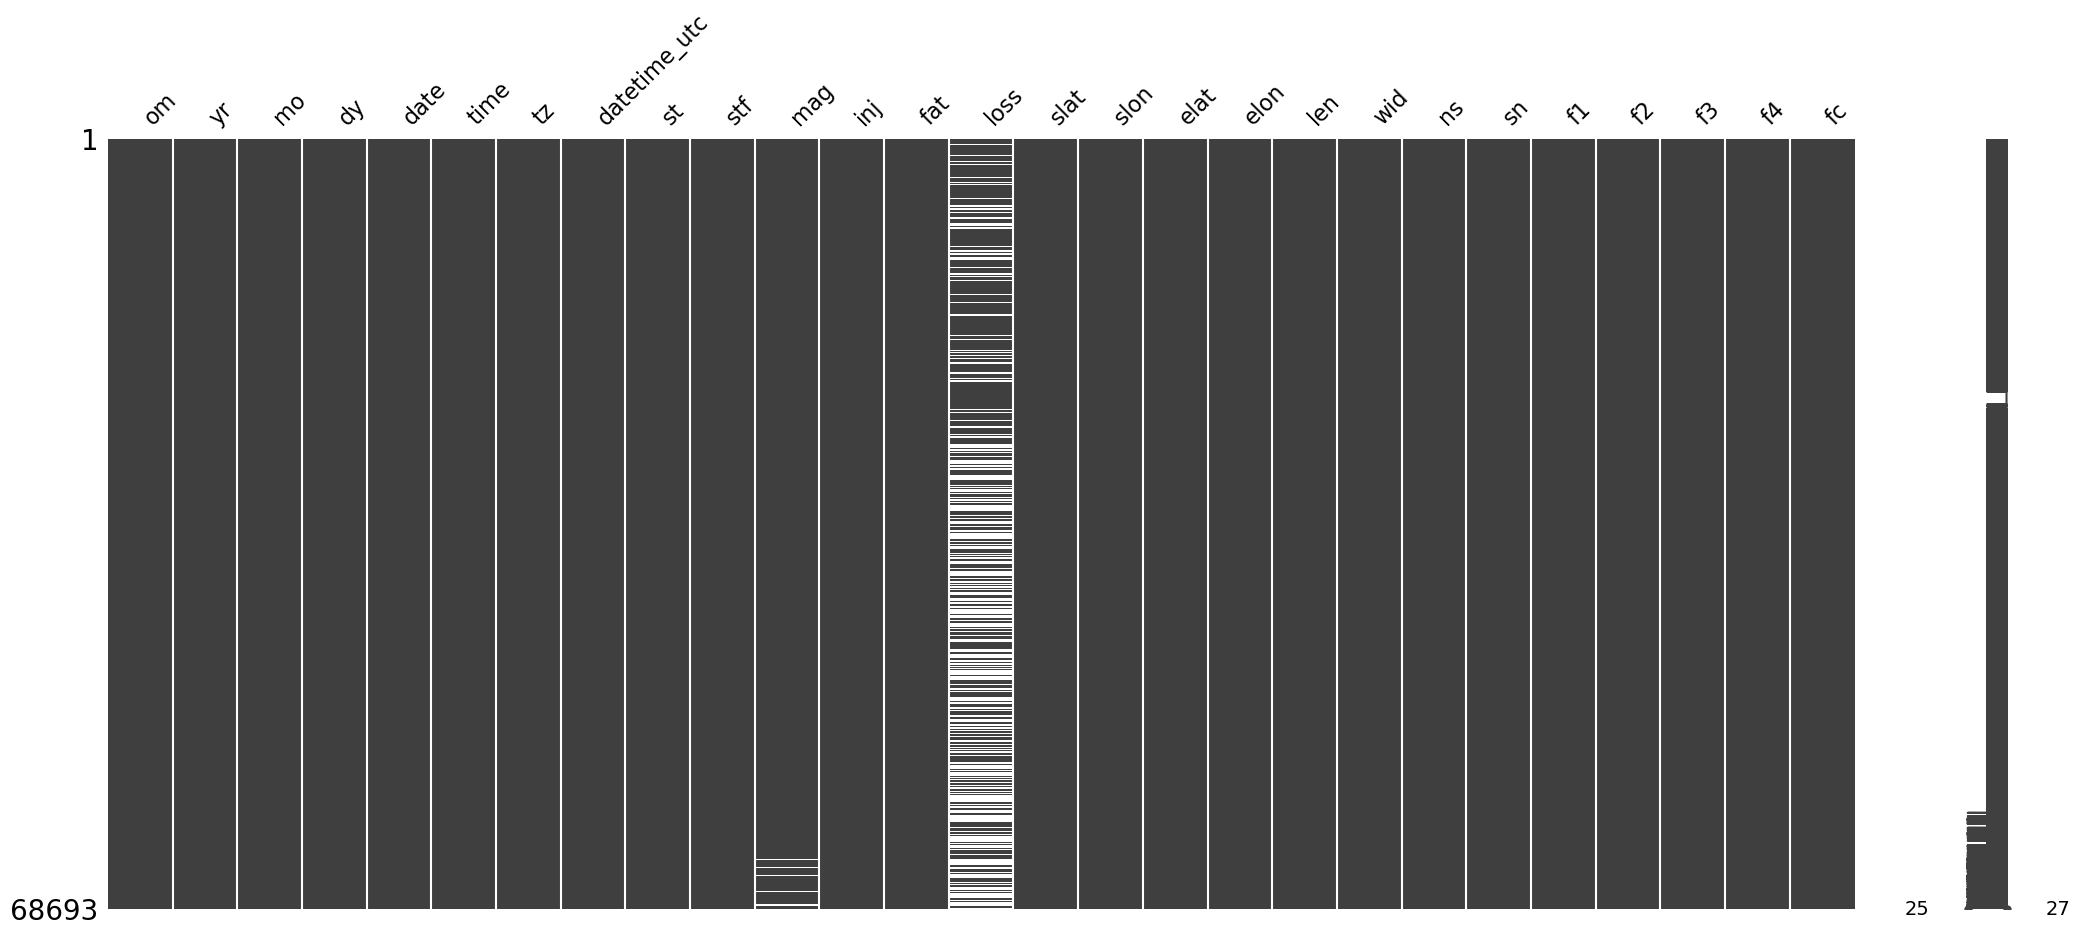

In [8]:
# Visualize missing values
import missingno as msno
msno.matrix(tornadoes)

columns with missing values:
- **mag**: 756 missing values, or 1.101%
- **loss**: 27170 missing values, or 38.553%

how we will handle these:
- **mag**: Drop rows with missing values since it only accounts for about 1% of data.
- **loss**: Dropping this variable since it isn't needed.

In [9]:
# Drop NA values from mag.
tornadoes.dropna(subset=['mag'], inplace=True)

# Drop loss variable.
tornadoes.drop(['loss'], axis=1, inplace=True)

In [10]:
tornadoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67937 entries, 0 to 68692
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   om            67937 non-null  int64  
 1   yr            67937 non-null  int64  
 2   mo            67937 non-null  int64  
 3   dy            67937 non-null  int64  
 4   date          67937 non-null  object 
 5   time          67937 non-null  object 
 6   tz            67937 non-null  object 
 7   datetime_utc  67937 non-null  object 
 8   st            67937 non-null  object 
 9   stf           67937 non-null  int64  
 10  mag           67937 non-null  float64
 11  inj           67937 non-null  int64  
 12  fat           67937 non-null  int64  
 13  slat          67937 non-null  float64
 14  slon          67937 non-null  float64
 15  elat          67937 non-null  float64
 16  elon          67937 non-null  float64
 17  len           67937 non-null  float64
 18  wid           67937 non-null  i

now that missing values have been handled, we'll check for duplicates. 

In [15]:
# Check for duplicate rows
duplicate_rows = tornadoes.duplicated().sum()
print("There are " + str(duplicate_rows) + " duplicate row(s).\n")

# Get a boolean series indicating which rows are duplicates (including the original rows)
duplicate_mask_all = tornadoes.duplicated(keep=False)

# Use this mask to filter and display both the original and duplicate rows
duplicate_rows_all_df = tornadoes[duplicate_mask_all]
duplicate_rows_all_df

There are 1 duplicate row(s).



om    yr  mo  dy        date      time               tz  \
59800  610626  2015   6  20  2015-06-20  18:32:00  America/Chicago   
59801  610626  2015   6  20  2015-06-20  18:32:00  America/Chicago   

               datetime_utc  st  stf  ...     elon   len  wid  ns  sn  f1  f2  \
59800  2015-06-20T23:32:00Z  IA   19  ... -91.2494  2.92   50   1   1  57   0   
59801  2015-06-20T23:32:00Z  IA   19  ... -91.2494  2.92   50   1   1  57   0   

       f3  f4     fc  
59800   0   0  False  
59801   0   0  False  

[2 rows x 26 columns]

In [16]:
# Remove duplicate rows, if any
if duplicate_rows > 0: 
    tornadoes.drop_duplicates(inplace=True)

# Verify that the removal worked
duplicate_rows = tornadoes.duplicated().sum()
print("There are " + str(duplicate_rows) + " duplicate row(s).\n")

There are 0 duplicate row(s).



now let's determine if any data types need conversion.

In [17]:
# Display data types for each column
tornadoes.dtypes

om                int64
yr                int64
mo                int64
dy                int64
date             object
time             object
tz               object
datetime_utc     object
st               object
stf               int64
mag             float64
inj               int64
fat               int64
slat            float64
slon            float64
elat            float64
elon            float64
len             float64
wid               int64
ns                int64
sn                int64
f1                int64
f2                int64
f3                int64
f4                int64
fc                 bool
dtype: object

we might consider changing `date` (the date), `time` (the time), and `datetime_utc` (the date and time normalized to UTC) from objects to DateTime. But we can wait to do this until we know we need these columns

# Exploratory Data Analysis

### 1. quick feature creation to aid in analysis
**create `region` by mapping states to cultural region**  

**create `decade` by organizing years into decades**  

**create categories which classify each tornado based on levels of its `wid`, `len`**  
*> This is to get a more well-rounded idea of tornado severity rather than relying only on `mag`*  
*> current labels are `wid_level` for `wid`, `Track Length` for length. I need to change these names so they are easier to understand*

**create `in_alley` column to classify each tornado as either "inside" or "outside" tornado alley**

**create subset dataframes for each decade**  

**create other features as needed**


### 2. visualization
**visualize simple frequency of tornadoes over time.**  
*> this will let us see and discuss the overall trend over time.*  
*> then we can break this down further into categories of severity, using `mag` and the newly-created categorical variables `wid_level` and `Track Length`*  
*> then break the overall frequency down into inside/outside tornado alley using `in_alley` so we can see how the overall frequency is changing in these locations over time.*  

**what is the frequency of tornadoes across states and regions? what about for larger (higher mag, larger wid, longer len) tornadoes?**  
*> bar charts displaying frequencies in regions and states*  
*> like above, can do further break-down into the severity trends*  

**of which months in the year are tornadoes most frequent? what about for larger (higher mag, larger wid, longer len) tornadoes?**  
*> we could analyze the seasonality of tornadoes over time using `mo`. the hypothesis might be that "tornado season" is increasing (there is an increase in months in which tornadoes are common)*   
*> if we figure out how to do the above, we could then see how the further break-down looks across different severity levels*  

**other indicators**  
*> injuries, fatalities as indicators*  

**geographical analysis**  
*> how does geographical distribution of all tornadoes look like over the decades?*  
*> what about across severity levels?*  
*> use heatmaps to highlight hotspots*  

### 3. statistical analysis
**visualize descriptive statistics of numerical columns**

### 4. relationships between variables
**determine whether correlations exist** 

**do any variables exhibit linear relationships?**    

**do we see an uptick in tornado frequency across decades?**  

**do we see an uptick in tornado intensity across decades?**  

**do we see an uptick in tornado frequency in certain regions across decades?**  

**do we see an uptick in injuries, fatalities, or property loss (factors) across decades (groups)?**  

**do we see any change in the mean latitudes and longitudes across decades? (this would indicate a shift in the tornado zone)**  

**look for nonlinear relationships**  

### 1. quick feature creation
**create `region`:**  
below we establish a dictionary for all 50 possible us states. then, iterate thru `st` and classify each state into a region by postal code.  

In [18]:
# Dictionary to map the 50 US states to regions
states_and_regions = {
    'ME': 'New England', 'NH': 'New England', 'VT': 'New England', 'MA': 'New England', 
    'RI': 'New England', 'CT': 'New England',
    
    'NY': 'Mid-Atlantic', 'NJ': 'Mid-Atlantic', 'PA': 'Mid-Atlantic', 
    'DE': 'Mid-Atlantic', 'MD': 'Mid-Atlantic', 'DC': 'Mid-Atlantic', 
    
    'VA': 'Upper South', 'WV': 'Upper South', 'KY': 'Upper South', 'TN': 'Upper South', 
    'NC': 'Upper South', 'AR': 'Upper South', 'MO': 'Upper South',
    
    'OK': 'Deep South', 'SC': 'Deep South', 'GA': 'Deep South', 'AL': 'Deep South', 
    'MS': 'Deep South', 'LA': 'Deep South', 'FL': 'Deep South',
    
    'TX': 'Southwest', 'AZ': 'Southwest', 'NM': 'Southwest', 
    
    'CA': 'Pacific', 'NV': 'Pacific', 'OR': 'Pacific', 'WA': 'Pacific', 'HI': 'Pacific', 
    
    'AK': 'Pacific Northwest',
    
    'OH': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'WI': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'NE': 'Midwest', 'SD': 'Midwest', 'ND': 'Midwest', 
    'KS': 'Midwest',
    
    'MT': 'Mountain West', 'ID': 'Mountain West', 'WY': 'Mountain West', 
    'CO': 'Mountain West', 'UT': 'Mountain West'
}

# Map the states to a region in new column
tornadoes['region'] = tornadoes['st'].map(states_and_regions)

**create `decade`:**  
this will iterate thru `yr` and attach the categorical decade label in new column called `decade`. in the format e.g. "1950-1959"

In [19]:
# classifies each row's `yr` into new column of objects, `decade`
tornadoes['decade'] = tornadoes['yr'].apply(lambda x: f"{x//10*10}-{x//10*10+9}")

 **create `wid_level`**  
 this will iterate through `wid`, a continuous variable, to classify tornado widths based on three classes tornadoes can be organized into.  
 *get source for class info.*  

In [20]:
# Create new column that classifies each tornado by width
def wid_categories(wid):
    if wid < 50:
        return 'Narrow (< 50 Yards)'
    elif wid >= 50 and wid < 500:
        return 'Medium (50 - 500 Yards)'
    elif wid >= 500:
        return 'Large (>= 500 Yards)'

tornadoes['wid_level'] = tornadoes['wid'].apply(wid_categories)
tornadoes['wid_level']

0            Narrow (< 50 Yards)
1           Large (>= 500 Yards)
2            Narrow (< 50 Yards)
3            Narrow (< 50 Yards)
4            Narrow (< 50 Yards)
                  ...           
68687    Medium (50 - 500 Yards)
68688    Medium (50 - 500 Yards)
68689        Narrow (< 50 Yards)
68691        Narrow (< 50 Yards)
68692    Medium (50 - 500 Yards)
Name: wid_level, Length: 67936, dtype: object

**create `wid_category`**  
*forgot if still needed this. might delete.*  

In [ ]:
# Create new column that classifies each tornado by width
def wid_categories2(wid):
    if wid < 50:
        return 'Narrow'
    elif wid >= 50 and wid < 500:
        return 'Medium'
    elif wid >= 500:
        return 'Large'

tornadoes['wid_category'] = tornadoes['wid'].apply(wid_categories2)
tornadoes['wid_category']

**create `Track Length`** 
iterate thru `len` and classify into three classes based on tornado track length (the path in which the tornado takes while it is touching the ground).  
 *get source for class info.*  
 *also consider changing name to be more like wid_length OR vice versa.*  

In [30]:
# Create new column that classifies each tornado by length
def len_categories(len):
    if len < 10:
        return 'Short_Track (< 10 Miles)'
    elif len >= 10 and len < 50:
        return 'Medium-Track (10 - 50 Miles)'
    elif len >= 50:
        return 'Long-Track (>= 50 Miles)'

tornadoes['Track Length'] = tornadoes['len'].apply(len_categories)
tornadoes['Track Length']

0        Medium-Track (10 - 50 Miles)
1            Short_Track (< 10 Miles)
2            Short_Track (< 10 Miles)
3            Short_Track (< 10 Miles)
4            Short_Track (< 10 Miles)
                     ...             
68687        Short_Track (< 10 Miles)
68688        Short_Track (< 10 Miles)
68689        Short_Track (< 10 Miles)
68691        Short_Track (< 10 Miles)
68692        Short_Track (< 10 Miles)
Name: Track Length, Length: 67936, dtype: object

**create `len_level`**  
*> this is hopefully only temporary. had to create this to get a map scatterplot to work*  

In [100]:
# Create new column that classifies each tornado by length using single word
def len_categories2(len):
    if len < 10:
        return 'Short'
    elif len >= 10 and len < 50:
        return 'Medium'
    elif len >= 50:
        return 'Long'

tornadoes['len_level'] = tornadoes['len'].apply(len_categories2)
tornadoes['len_level']

0        Medium
1         Short
2         Short
3         Short
4         Short
          ...  
68687     Short
68688     Short
68689     Short
68691     Short
68692     Short
Name: len_level, Length: 67936, dtype: object

**create `in_alley`**  
using the inside of longitudes -105 and -95 as a general 'tornado alley', classifies each tornado based on it's `slon` (starting longitude) as either 'inside' or 'outside' tonrado alley  
*get source for this info.*  

In [145]:
# Create new column that classifies each tornado by its location (inside tornado alley, outside tornado alley)
def inside_outside(row):
    slon = row['slon']
    slat = row['slat']
    if slon >= -105 and slon <= -95 and slat >= 25 and slat <= 44:
        return 'Inside Tornado Alley'
    else:
        return 'Outside Tornado Alley'

tornadoes['in_alley'] = tornadoes.apply(inside_outside, axis=1)
tornadoes['in_alley']

0         Inside Tornado Alley
1        Outside Tornado Alley
2        Outside Tornado Alley
3        Outside Tornado Alley
4        Outside Tornado Alley
                 ...          
68687    Outside Tornado Alley
68688    Outside Tornado Alley
68689    Outside Tornado Alley
68691    Outside Tornado Alley
68692    Outside Tornado Alley
Name: in_alley, Length: 67936, dtype: object

**create subset dfs, `tornadoes_1950s` thru `tornadoes_2010s`**  
*might use for examining seasonality and/or geographical representations*  

In [134]:
# Create subsets of tornadoes for each decade
tornadoes_1950s = tornadoes.query("decade == '1950-1959'")
tornadoes_1960s = tornadoes.query("decade == 1960")
tornadoes_1970s = tornadoes.query("decade == 1970")
tornadoes_1980s = tornadoes.query("decade == 1980")
tornadoes_1990s = tornadoes.query("decade == 1990")
tornadoes_2000s = tornadoes.query("decade == 2000")
tornadoes_2010s = tornadoes.query("decade == '2010-2019'")

### 2. Visualization
**Tornado frequencies over time**  
*Below, we can see that the overall count of all tornadoes is increasing over time.*  

*Then, we break this down into those tornadoes inside and outside tornado alley. It appears that tornadoes are increasing in frequency outside tornado alley. this suggests that either the area we consider "tornado alley" is either shifting or widening (tornadoes are spilling out).*  

*Using different width classifications, we notice that different widths of tornadoes appear to be increasing at different rates. we definitely see an increased frequency of medium and large width tornadoes, with narrow ones remaining the same or decreaing. This might suggest that overall, tornados are getting bigger.*  

*We also do this with tornado track lengths. it seems that short-track and medium-track tornadoes are increasing in frequency, but long-track ones don't seem to be changing much.*  

**all tornadoes:**

Text(0, 0.5, 'Number of tornadoes')

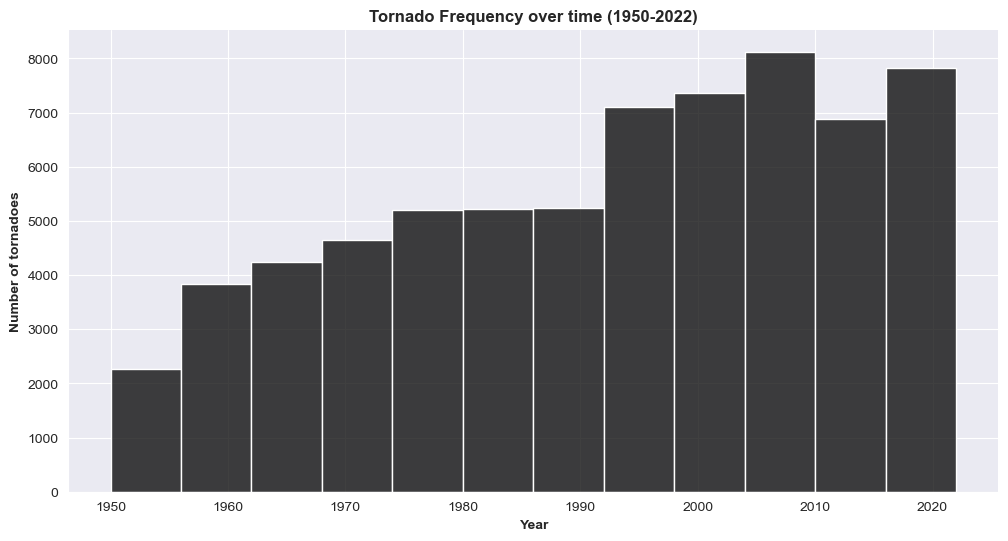

In [185]:
# Visualize simple frequencies of all tornadoes over time
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.histplot(x='yr', data=tornadoes, color='black', ax=ax, bins=12)
ax.set_title('Tornado Frequency over time (1950-2022)', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Number of tornadoes', weight='bold')

**by location (in/out of tornado alley):**  
*> it appears that tornadoes outside of 'tornado alley' make up a large portion of the increase in overall frequency.*

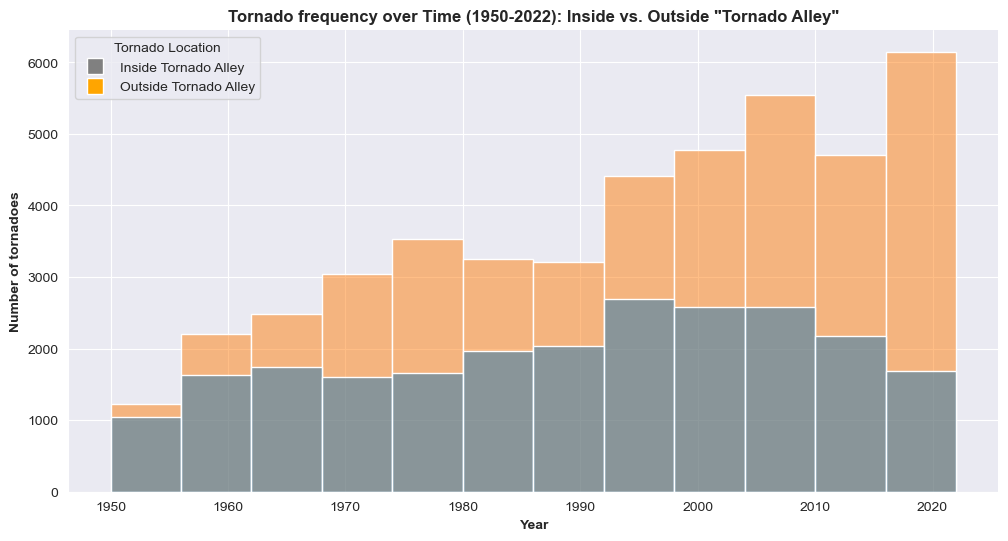

In [184]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.histplot(x='yr', data=tornadoes, hue='in_alley', ax=ax, bins=12)
ax.set_title('Tornado frequency over Time (1950-2022): Inside vs. Outside of "Tornado Alley"', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Number of tornadoes', weight='bold')
legend_labels=['Inside Tornado Alley', 'Outside Tornado Alley']
legend_colors=['Gray', 'Orange']
legend_handles = [plt.Line2D([0], [0], marker='s', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Tornado Location')

In [ ]:
# Histogram of the number of different sized tornadoes over time 

# Filter tornadoes by width 
high_wid = tornadoes[tornadoes['wid'] >= 500]
med_wid = tornadoes[(tornadoes['wid'] >= 50) & (tornadoes['wid'] < 500)]
low_wid = tornadoes[tornadoes['wid'] < 50]

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.histplot(x='yr', data=, color="Blue", ax=ax, bins=12)
sns.histplot(x='yr', data=med_wid, color="Yellow", ax=ax, bins=12)
sns.histplot(x='yr', data=high_wid, color="Green", ax=ax, bins=12)
ax.set_title('Tornado Frequencies over Time (1950-2022) and widths', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Number of tornadoes', weight='bold')

legend_labels=['Narrow (< 50 Yards)', 'Medium (50 - 500 Yards)', 'Large (>= 500 Yards)']
legend_colors=['Blue', 'Yellow', 'Green']
legend_handles = [plt.Line2D([0], [0], marker='s', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Tornado Width')

**by width:**

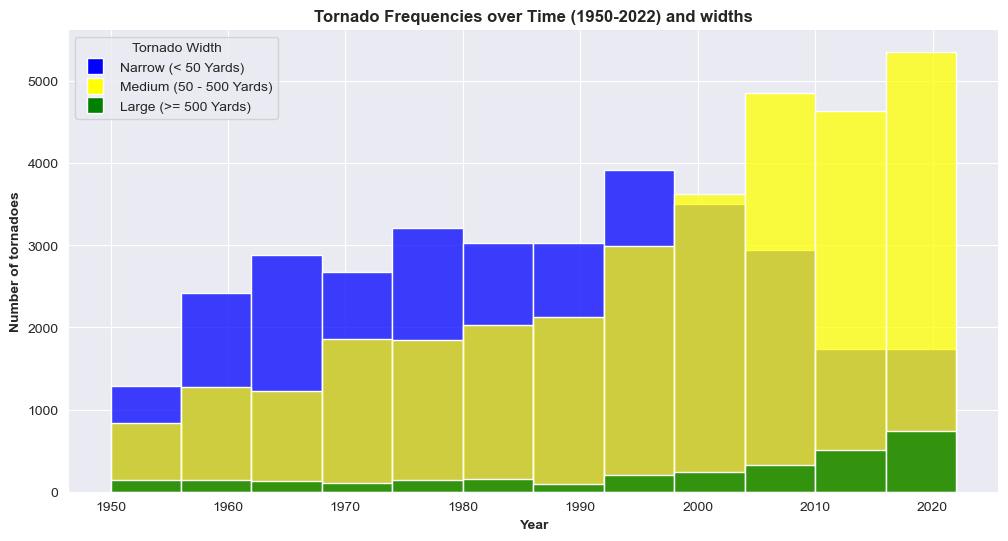

In [27]:
# Histogram of the number of different sized tornadoes over time 

# Filter tornadoes by width 
high_wid = tornadoes[tornadoes['wid'] >= 500]
med_wid = tornadoes[(tornadoes['wid'] >= 50) & (tornadoes['wid'] < 500)]
low_wid = tornadoes[tornadoes['wid'] < 50]

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.histplot(x='yr', data=low_wid, color="Blue", ax=ax, bins=12)
sns.histplot(x='yr', data=med_wid, color="Yellow", ax=ax, bins=12)
sns.histplot(x='yr', data=high_wid, color="Green", ax=ax, bins=12)
ax.set_title('Tornado Frequencies over Time (1950-2022) and widths', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Number of tornadoes', weight='bold')

legend_labels=['Narrow (< 50 Yards)', 'Medium (50 - 500 Yards)', 'Large (>= 500 Yards)']
legend_colors=['Blue', 'Yellow', 'Green']
legend_handles = [plt.Line2D([0], [0], marker='s', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Tornado Width')

**by track length:**  
*two representations because i was still figuring out how to do it.*  

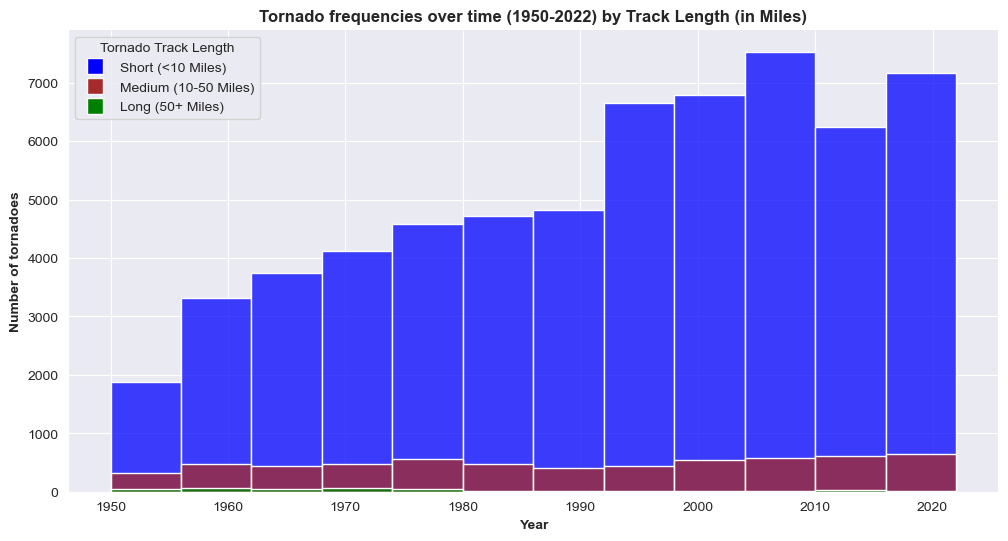

In [186]:
# Filter by tornadoes with width over 500 yds
high_len = tornadoes[tornadoes['len'] >= 50]
med_len = tornadoes[(tornadoes['len'] >= 10) & (tornadoes['len'] < 50)]
low_len = tornadoes[tornadoes['len'] < 10]

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.histplot(x='yr', data=low_len, color="Blue", ax=ax, bins=12)
sns.histplot(x='yr', data=med_len, color="Brown", ax=ax, bins=12)
sns.histplot(x='yr', data=high_len, color="Green", ax=ax, bins=12)
ax.set_title('Tornado frequencies over time (1950-2022) by Track Length (in Miles)', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Number of tornadoes', weight='bold')
legend_labels=['Short (<10 Miles)', 'Medium (10-50 Miles)', 'Long (50+ Miles)']
legend_colors=['Blue', 'Brown', 'Green']
legend_handles = [plt.Line2D([0], [0], marker='s', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Tornado Track Length')

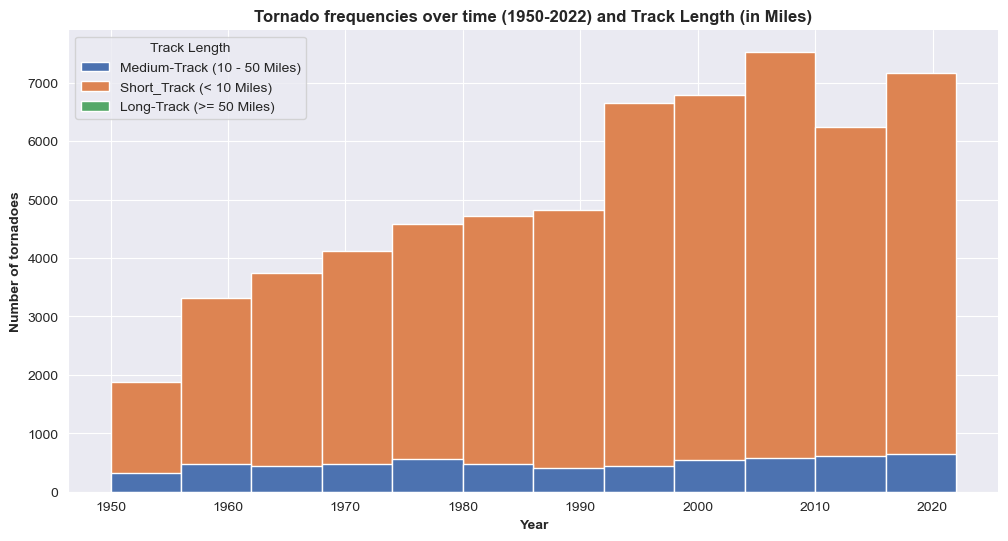

In [187]:
# just another way to visuzlize track length

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.histplot(x='yr', hue='Track Length', data=tornadoes, palette='deep', bins=12, alpha=1)
ax.set_title('Tornado frequencies over time (1950-2022) and Track Length (in Miles)', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Number of tornadoes', weight='bold')
plt.show()

**by magnitude:**  
*several representations because i was still figuring out how to do it.*  

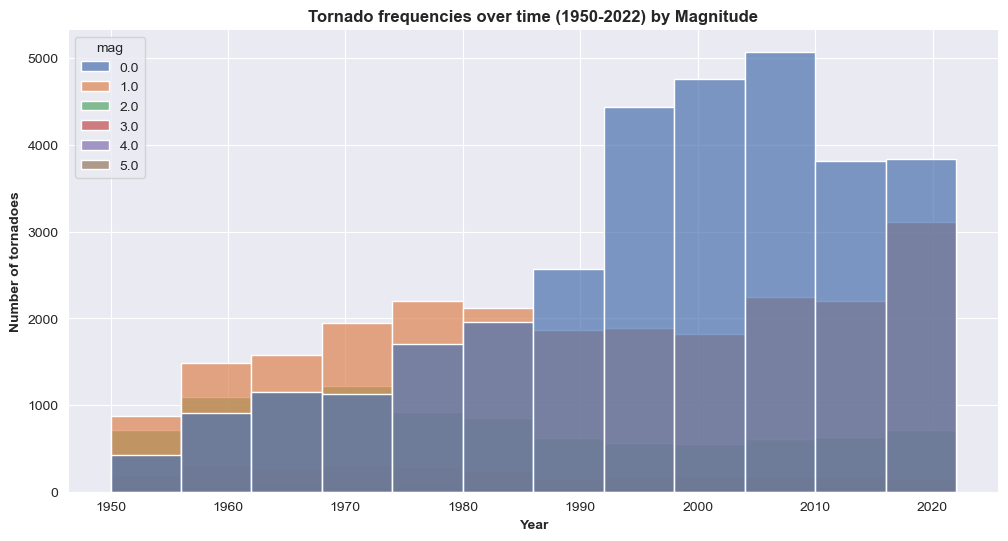

In [188]:
# Frequency of tornadoes and their magnitudes across states

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.histplot(x='yr', hue='mag', data=tornadoes, palette='deep', bins=12, alpha=0.7)
ax.set_title('Tornado frequencies over time (1950-2022) by Magnitude', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Number of tornadoes', weight='bold')
plt.show()

Text(0, 0.5, 'Number of tornadoes')

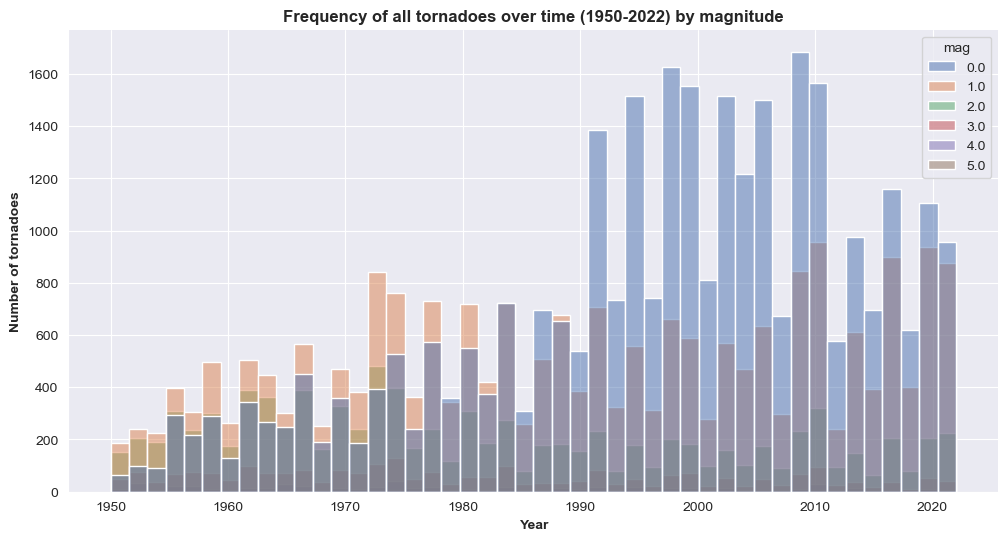

In [84]:
# Magnitudes over time again
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.histplot(x='yr', hue='mag', multiple='layer', data=tornadoes, palette="deep")
ax.set_title('Frequency of all tornadoes over time (1950-2022) by magnitude', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Number of tornadoes', weight='bold')

Text(0, 0.5, 'Number of tornadoes')

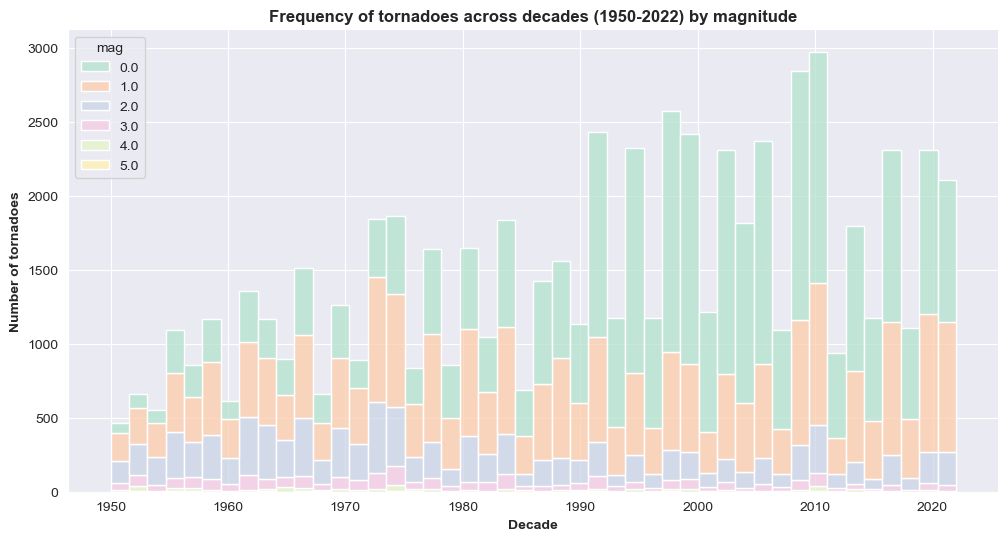

In [85]:
# Magnitudes over time (another)
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.histplot(x='yr', hue='mag', multiple='stack', data=tornadoes, palette="Pastel2")
ax.set_title('Frequency of tornadoes across decades (1950-2022) by magnitude', weight='bold')
ax.set_xlabel('Decade', weight='bold')
ax.set_ylabel('Number of tornadoes', weight='bold')

### 3. statistical analysis
**starting to visualize descriptive statistics of numerical columns**  
*probably could use some more basic univariate visualizations and discussion*  

**various bivariate/multivariate exploratory plots are below**  
*needs some cleanup and discussion*  

**Widths of ALL tornadoes over time:**  
*starting point before breaking down into different levels of severity*  

Text(0, 0.5, 'Width (Yards)')

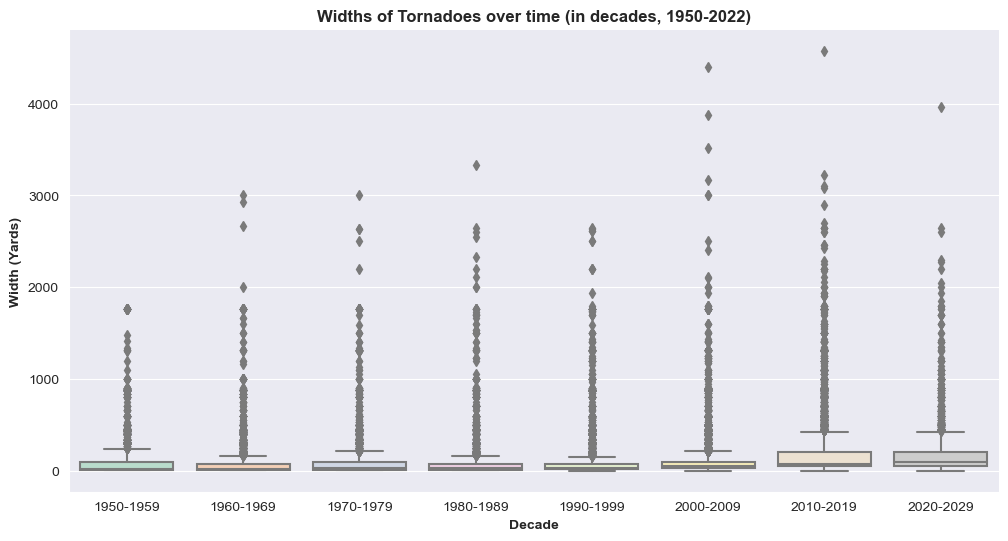

In [89]:
# Boxplot for widths of all tornadoes over time
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.boxplot(x='decade', y='wid', data=tornadoes, palette='Pastel2')
ax.set_title('Widths of Tornadoes over time (in decades, 1950-2022)', weight='bold')
ax.set_xlabel('Decade', weight='bold')
ax.set_ylabel('Width (Yards)', weight='bold')

**Widths of tornadoes over time, broken down into the three size categories (low, medium, high):**  
*This might make the analysis a little more manageable, letting us pick up on smaller trends that might otherwise be lost*   
*They might be out of order right now. they also will need some comments and general appearence cleanup*     

Text(0, 0.5, 'Width (Yards)')

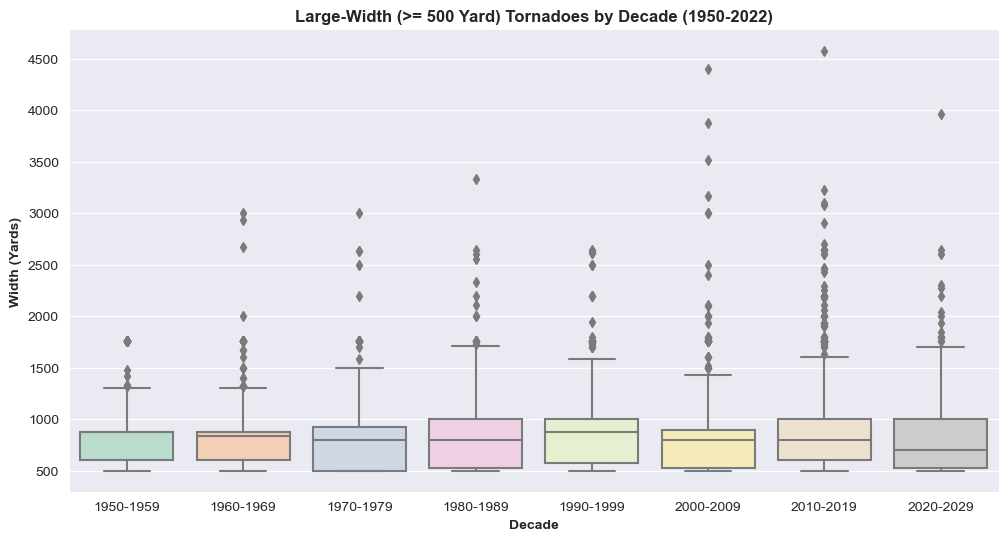

In [90]:
# Boxplot for tornado widths of the 'high width' category
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.boxplot(x='decade', y='wid', data=high_wid, palette='Pastel2')
ax.set_title('Large-Width (>= 500 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax.set_xlabel('Decade', weight='bold')
ax.set_ylabel('Width (Yards)', weight='bold')

Text(0, 0.5, 'Width (Yards)')

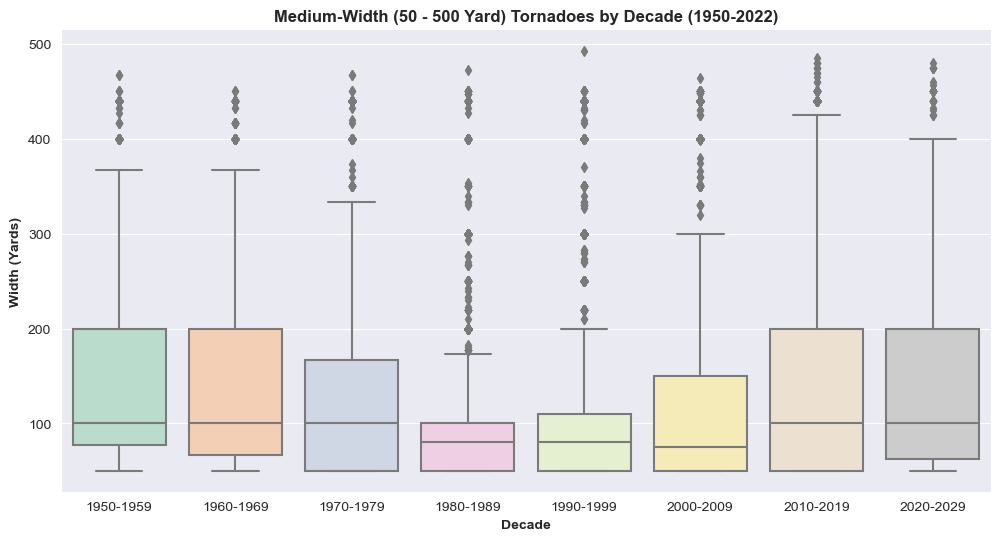

In [37]:
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.boxplot(x='decade', y='wid', data=med_wid, palette='Pastel2')
ax.set_title('Medium-Width (50 - 500 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax.set_xlabel('Decade', weight='bold')
ax.set_ylabel('Width (Yards)', weight='bold')

Text(0, 0.5, 'Width (Yards)')

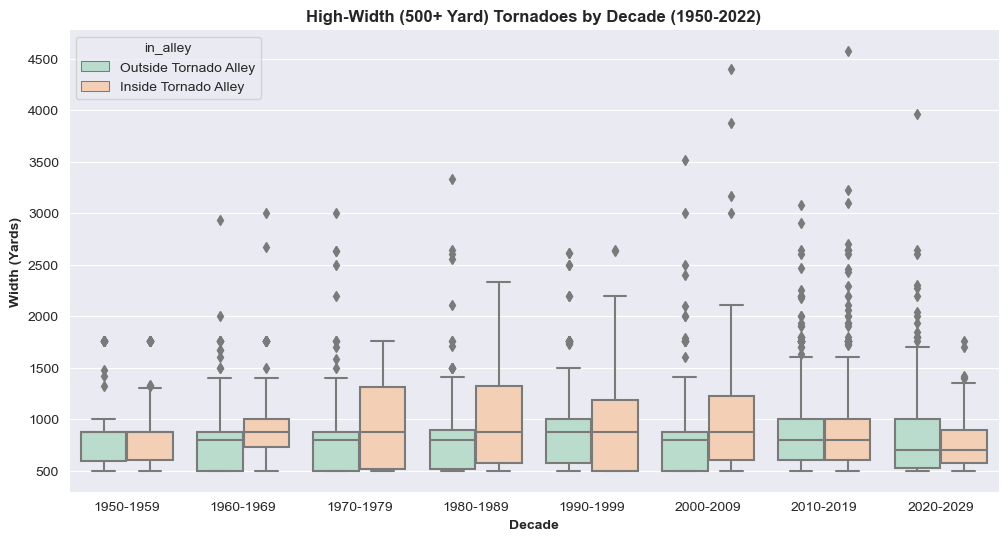

In [38]:
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.boxplot(x='decade', y='wid', hue='in_alley', data=high_wid, palette='Pastel2')
ax.set_title('High-Width (500+ Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax.set_xlabel('Decade', weight='bold')
ax.set_ylabel('Width (Yards)', weight='bold')

Text(0, 0.5, 'Width (Yards)')

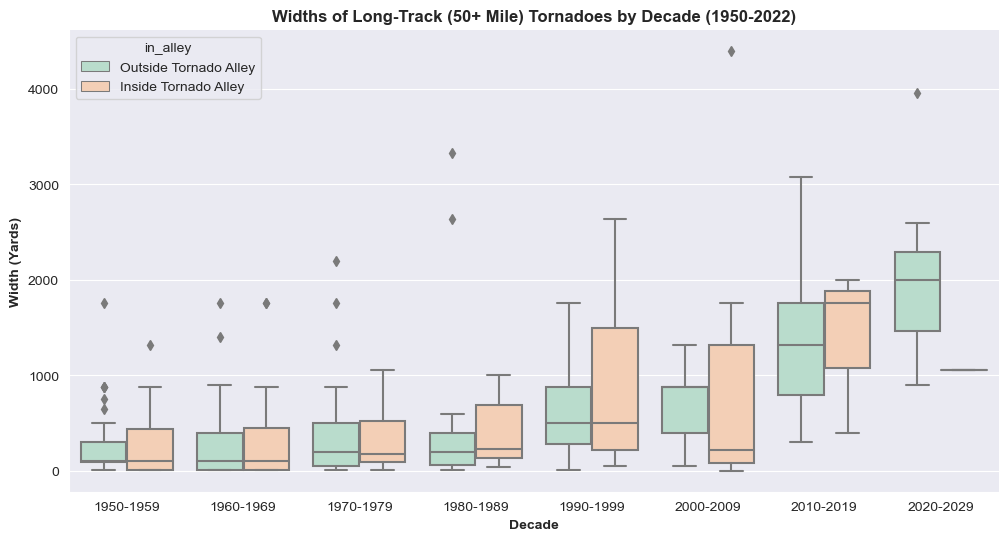

In [39]:
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.boxplot(x='decade', y='wid', hue='in_alley', data=high_len, palette='Pastel2')
ax.set_title('Widths of Long-Track (50+ Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax.set_xlabel('Decade', weight='bold')
ax.set_ylabel('Width (Yards)', weight='bold')

Text(0, 0.5, 'Width (Yards)')

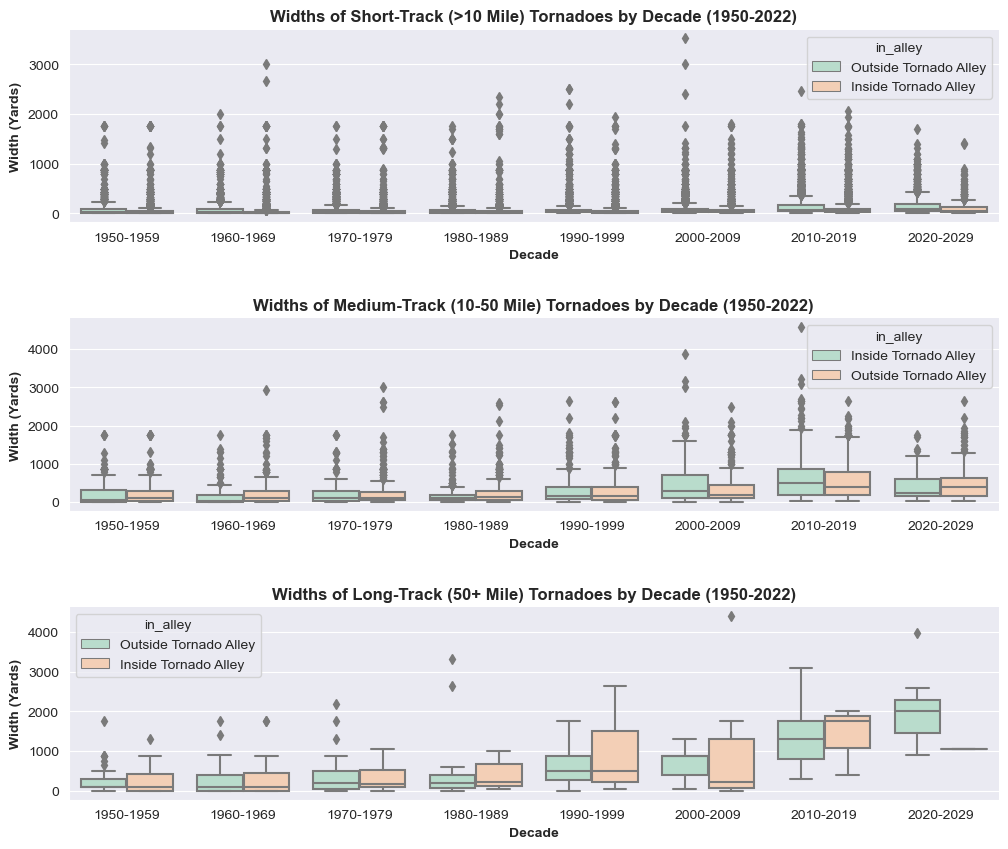

In [40]:
f, ax = plt.subplots(3, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine()

# Plot for short-track only
sns.boxplot(x='decade', y='wid', hue='in_alley', data=low_len, palette='Pastel2', ax=ax[0])
ax[0].set_title('Widths of Short-Track (>10 Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax[0].set_xlabel('Decade', weight='bold')
ax[0].set_ylabel('Width (Yards)', weight='bold')

# Plot for med-track only
sns.boxplot(x='decade', y='wid', hue='in_alley', data=med_len, palette='Pastel2', ax=ax[1])
ax[1].set_title('Widths of Medium-Track (10-50 Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax[1].set_xlabel('Decade', weight='bold')
ax[1].set_ylabel('Width (Yards)', weight='bold')

# Plot for long-track only
sns.boxplot(x='decade', y='wid', hue='in_alley', data=high_len, palette='Pastel2', ax=ax[2])
ax[2].set_title('Widths of Long-Track (50+ Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax[2].set_xlabel('Decade', weight='bold')
ax[2].set_ylabel('Width (Yards)', weight='bold')

**what is the frequency of tornadoes across states and regions? what about for larger (higher mag, larger wid, longer len) tornadoes?**
- The top 10 states of all time as well as the regions are shown below.   
*As expected, southern and midwestern regions ad their states are the most common*  
*Visualize this over time*  
*Put total frequency and in/out tornado alley stuff here*

(0.0, 20.0)

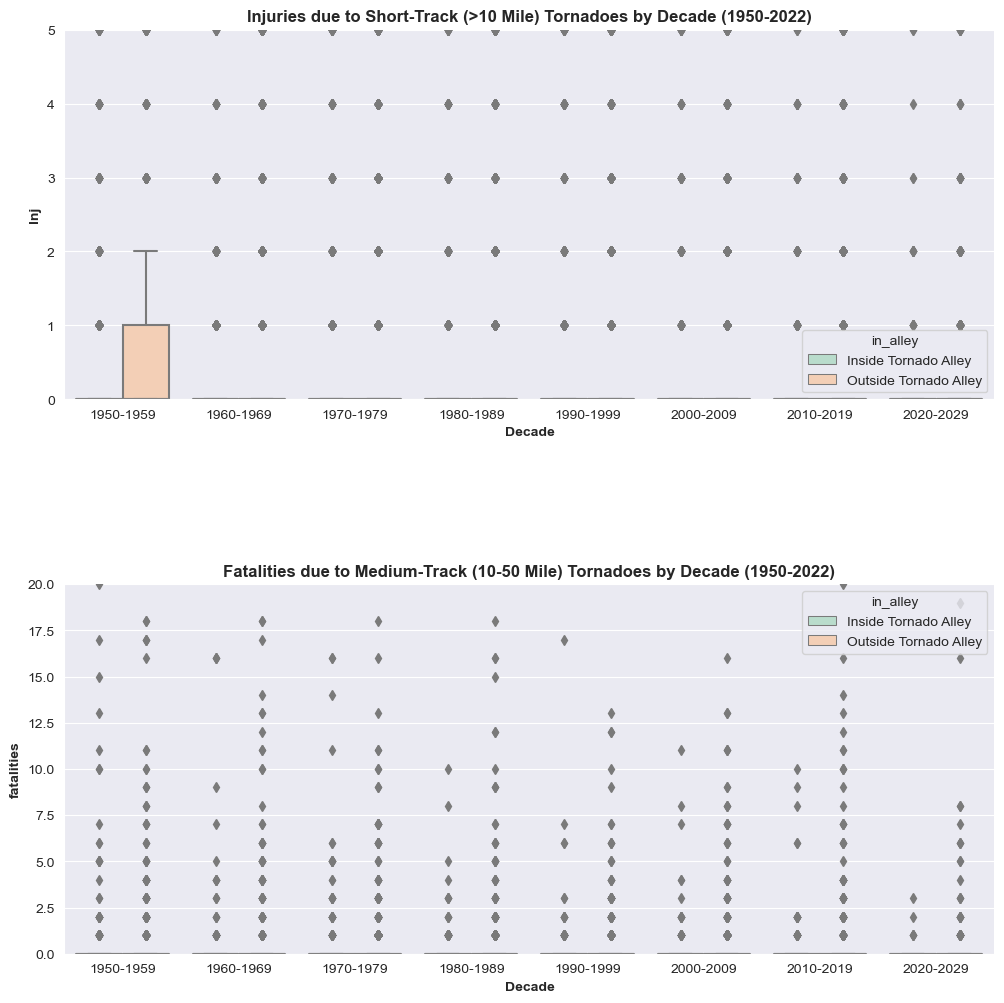

In [42]:
# Other indicators across space and time
f, ax = plt.subplots(2, 1, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine()

# Plot for injuries
sns.boxplot(x='decade', y='inj', hue='in_alley', data=tornadoes, palette='Pastel2', ax=ax[0])
ax[0].set_title('Injuries due to Short-Track (>10 Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax[0].set_xlabel('Decade', weight='bold')
ax[0].set_ylabel('Inj', weight='bold')
ax[0].set_ylim(0,5)

# Plot for fatalities
sns.boxplot(x='decade', y='fat', hue='in_alley', data=tornadoes, palette='Pastel2', ax=ax[1])
ax[1].set_title('Fatalities due to Medium-Track (10-50 Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax[1].set_xlabel('Decade', weight='bold')
ax[1].set_ylabel('fatalities', weight='bold')
ax[1].set_ylim(0,20)

Text(0, 0.5, 'Width (Yards)')

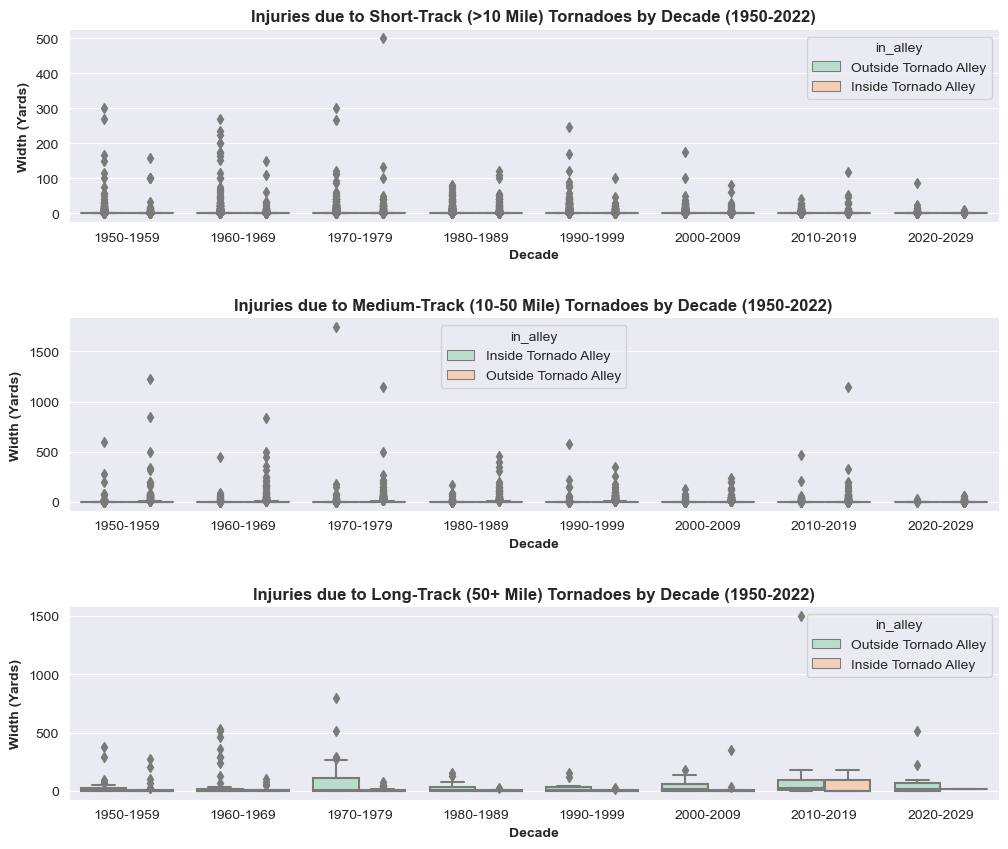

In [43]:
# Injuries by track length
f, ax = plt.subplots(3, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine()

# Plot for short track only
sns.boxplot(x='decade', y='inj', hue='in_alley', data=low_len, palette='Pastel2', ax=ax[0])
ax[0].set_title('Injuries due to Short-Track (>10 Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax[0].set_xlabel('Decade', weight='bold')
ax[0].set_ylabel('Width (Yards)', weight='bold')

# Plot for med track only
sns.boxplot(x='decade', y='inj', hue='in_alley', data=med_len, palette='Pastel2', ax=ax[1])
ax[1].set_title('Injuries due to Medium-Track (10-50 Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax[1].set_xlabel('Decade', weight='bold')
ax[1].set_ylabel('Width (Yards)', weight='bold')

# Plot for long track only
sns.boxplot(x='decade', y='inj', hue='in_alley', data=high_len, palette='Pastel2', ax=ax[2])
ax[2].set_title('Injuries due to Long-Track (50+ Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax[2].set_xlabel('Decade', weight='bold')
ax[2].set_ylabel('Width (Yards)', weight='bold')

(0.0, 400000000.0)

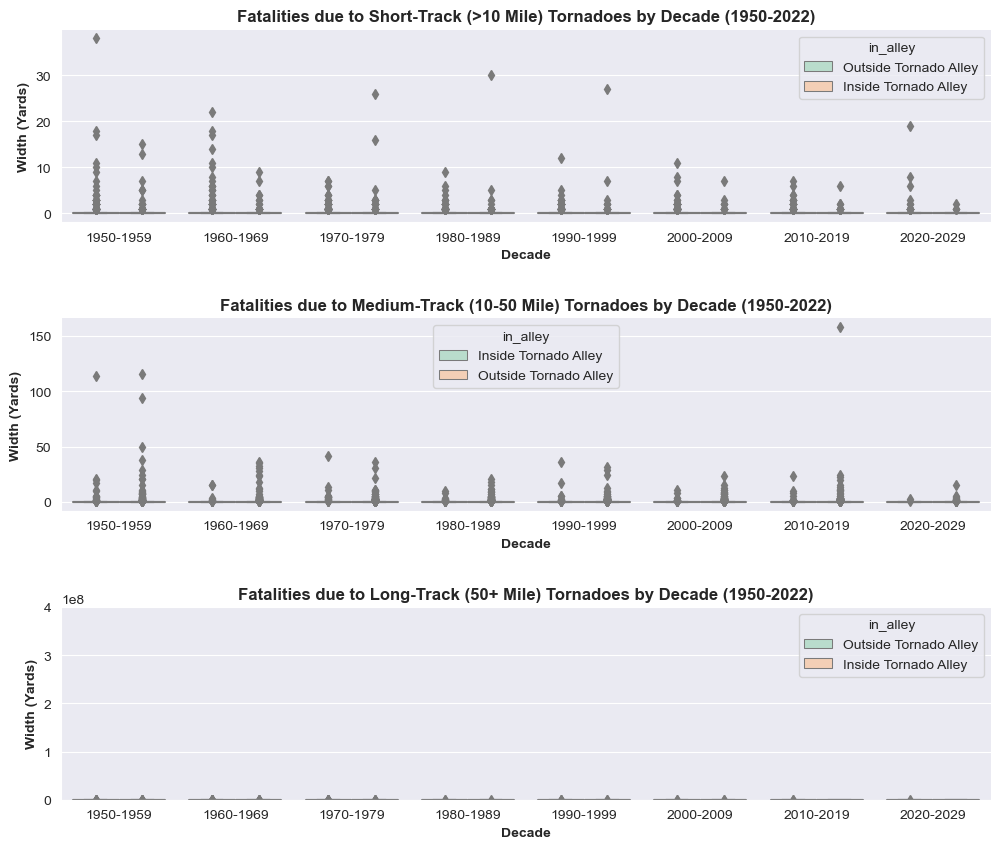

In [44]:
# Fatalities by track length
f, ax = plt.subplots(3, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine()
sns.boxplot(x='decade', y='fat', hue='in_alley', data=low_len, palette='Pastel2', ax=ax[0])
ax[0].set_title('Fatalities due to Short-Track (>10 Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax[0].set_xlabel('Decade', weight='bold')
ax[0].set_ylabel('Width (Yards)', weight='bold')

sns.boxplot(x='decade', y='fat', hue='in_alley', data=med_len, palette='Pastel2', ax=ax[1])
ax[1].set_title('Fatalities due to Medium-Track (10-50 Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax[1].set_xlabel('Decade', weight='bold')
ax[1].set_ylabel('Width (Yards)', weight='bold')

sns.boxplot(x='decade', y='fat', hue='in_alley', data=high_len, palette='Pastel2', ax=ax[2])
ax[2].set_title('Fatalities due to Long-Track (50+ Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax[2].set_xlabel('Decade', weight='bold')
ax[2].set_ylabel('Width (Yards)', weight='bold')
ax[2].set_ylim(0,400000000)

Text(0, 0.5, 'Width (Yards)')

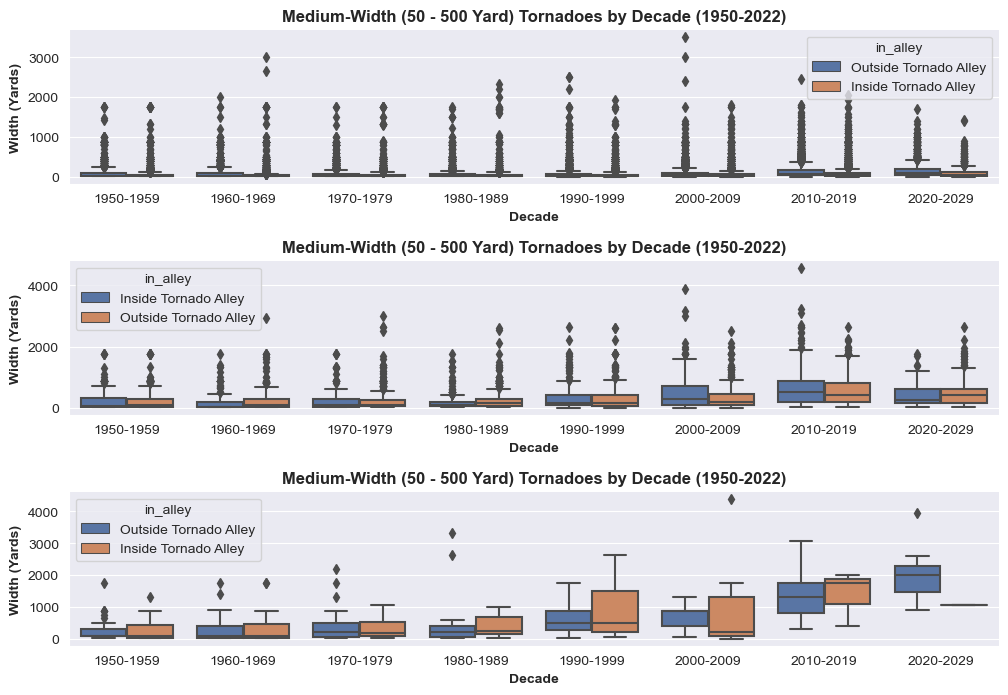

In [46]:
# lengths by width
f, ax = plt.subplots(3, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine()
sns.boxplot(x='decade', y='wid', hue='in_alley', data=low_len, palette='deep', ax=ax[0])
ax[0].set_title('Medium-Width (50 - 500 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax[0].set_xlabel('Decade', weight='bold')
ax[0].set_ylabel('Width (Yards)', weight='bold')

sns.boxplot(x='decade', y='wid', hue='in_alley', data=med_len, palette='deep', ax=ax[1])
ax[1].set_title('Medium-Width (50 - 500 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax[1].set_xlabel('Decade', weight='bold')
ax[1].set_ylabel('Width (Yards)', weight='bold')

sns.boxplot(x='decade', y='wid', hue='in_alley', data=high_len, palette='deep', ax=ax[2])
ax[2].set_title('Medium-Width (50 - 500 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax[2].set_xlabel('Decade', weight='bold')
ax[2].set_ylabel('Width (Yards)', weight='bold')

Text(0, 0.5, 'Width (Yards)')

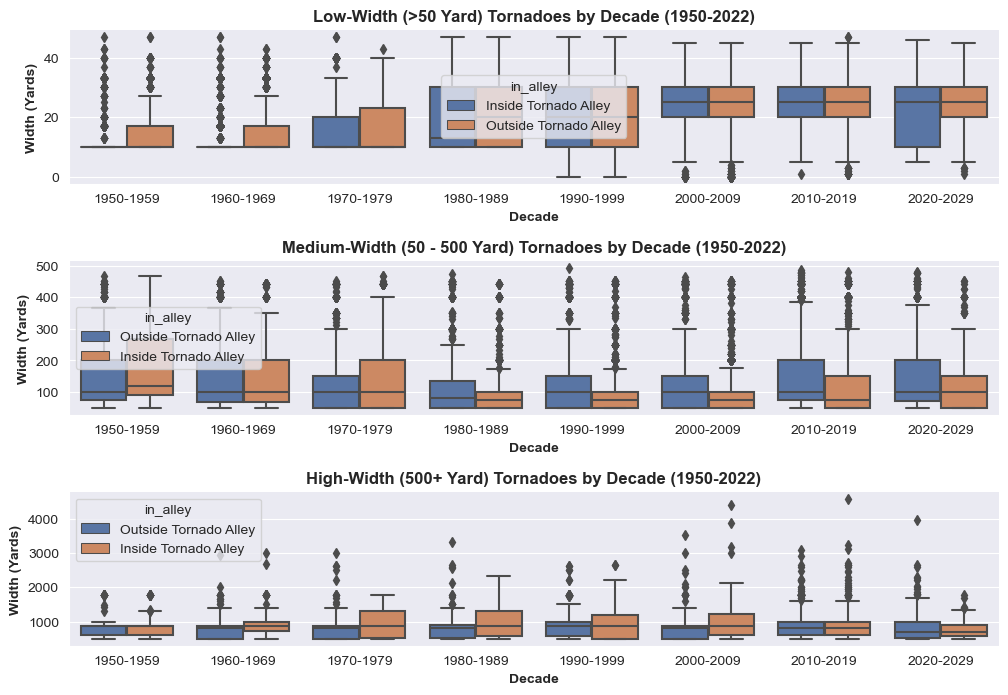

In [47]:
# widths by width
f, ax = plt.subplots(3, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine()
sns.boxplot(x='decade', y='wid', hue='in_alley', data=low_wid, palette='deep', ax=ax[0])
ax[0].set_title('Low-Width (>50 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax[0].set_xlabel('Decade', weight='bold')
ax[0].set_ylabel('Width (Yards)', weight='bold')

sns.boxplot(x='decade', y='wid', hue='in_alley', data=med_wid, palette='deep', ax=ax[1])
ax[1].set_title('Medium-Width (50 - 500 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax[1].set_xlabel('Decade', weight='bold')
ax[1].set_ylabel('Width (Yards)', weight='bold')

sns.boxplot(x='decade', y='wid', hue='in_alley', data=high_wid, palette='deep', ax=ax[2])
ax[2].set_title('High-Width (500+ Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax[2].set_xlabel('Decade', weight='bold')
ax[2].set_ylabel('Width (Yards)', weight='bold')

Text(0, 0.5, 'Width (Yards)')

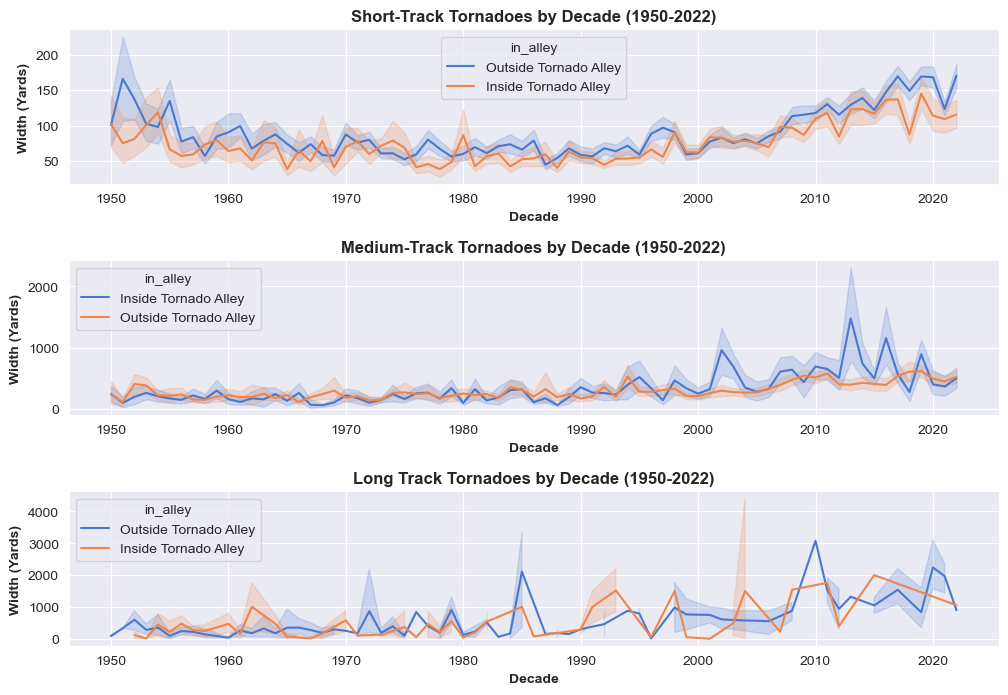

In [48]:
# lengths by widths line charts
f, ax = plt.subplots(3, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine()
sns.lineplot(x='yr', y='wid', hue='in_alley', data=low_len, palette='muted', ax=ax[0])
ax[0].set_title('Short-Track Tornadoes by Decade (1950-2022)', weight='bold')
ax[0].set_xlabel('Decade', weight='bold')
ax[0].set_ylabel('Width (Yards)', weight='bold')

sns.lineplot(x='yr', y='wid', hue='in_alley', data=med_len, palette='muted', ax=ax[1])
ax[1].set_title('Medium-Track Tornadoes by Decade (1950-2022)', weight='bold')
ax[1].set_xlabel('Decade', weight='bold')
ax[1].set_ylabel('Width (Yards)', weight='bold')

sns.lineplot(x='yr', y='wid', hue='in_alley', data=high_len, palette='muted', ax=ax[2])
ax[2].set_title('Long Track Tornadoes by Decade (1950-2022)', weight='bold')
ax[2].set_xlabel('Decade', weight='bold')
ax[2].set_ylabel('Width (Yards)', weight='bold')

<Axes: xlabel='yr', ylabel='wid'>

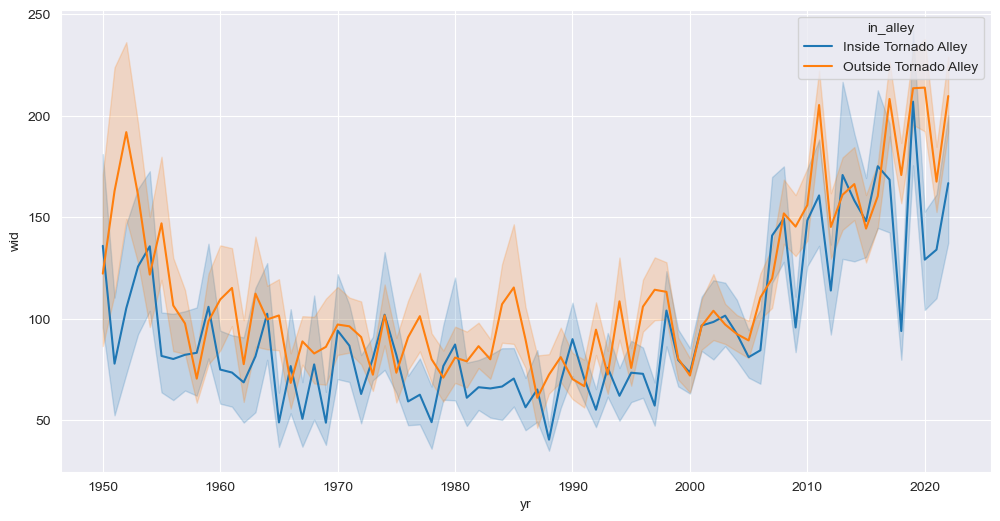

In [49]:
# width by year and location
f, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='yr', y='wid', data=tornadoes, hue='in_alley')

Text(0, 0.5, 'Width (Yards)')

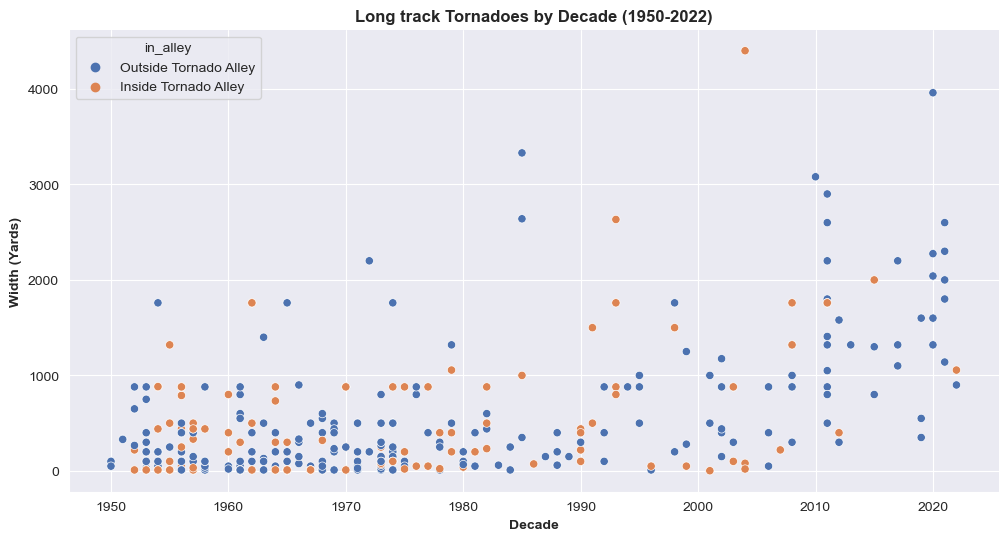

In [50]:
# scatter of long track by decade
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.scatterplot(x='yr', y='wid', hue='in_alley', data=high_len, palette='deep')
ax.set_title('Long track Tornadoes by Decade (1950-2022)', weight='bold')
ax.set_xlabel('Decade', weight='bold')
ax.set_ylabel('Width (Yards)', weight='bold')

Text(0, 0.5, 'Width (Yards)')

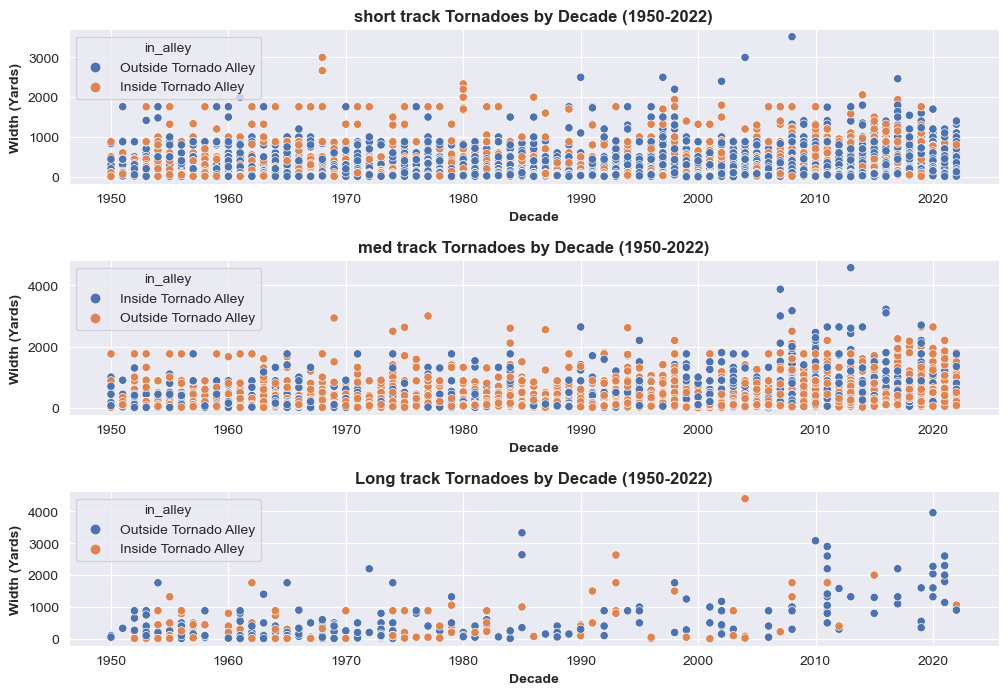

In [51]:
# track length by wid
f, ax = plt.subplots(3, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine()
sns.scatterplot(x='yr', y='wid', hue='in_alley', data=low_len, palette='deep', ax=ax[0])
ax[0].set_title('short track Tornadoes by Decade (1950-2022)', weight='bold')
ax[0].set_xlabel('Decade', weight='bold')
ax[0].set_ylabel('Width (Yards)', weight='bold')

sns.scatterplot(x='yr', y='wid', hue='in_alley', data=med_len, palette='deep', ax=ax[1])
ax[1].set_title('med track Tornadoes by Decade (1950-2022)', weight='bold')
ax[1].set_xlabel('Decade', weight='bold')
ax[1].set_ylabel('Width (Yards)', weight='bold')

sns.scatterplot(x='yr', y='wid', hue='in_alley', data=high_len, palette='deep', ax=ax[2])
ax[2].set_title('Long track Tornadoes by Decade (1950-2022)', weight='bold')
ax[2].set_xlabel('Decade', weight='bold')
ax[2].set_ylabel('Width (Yards)', weight='bold')

Text(0, 0.5, 'Track Length (Miles)')

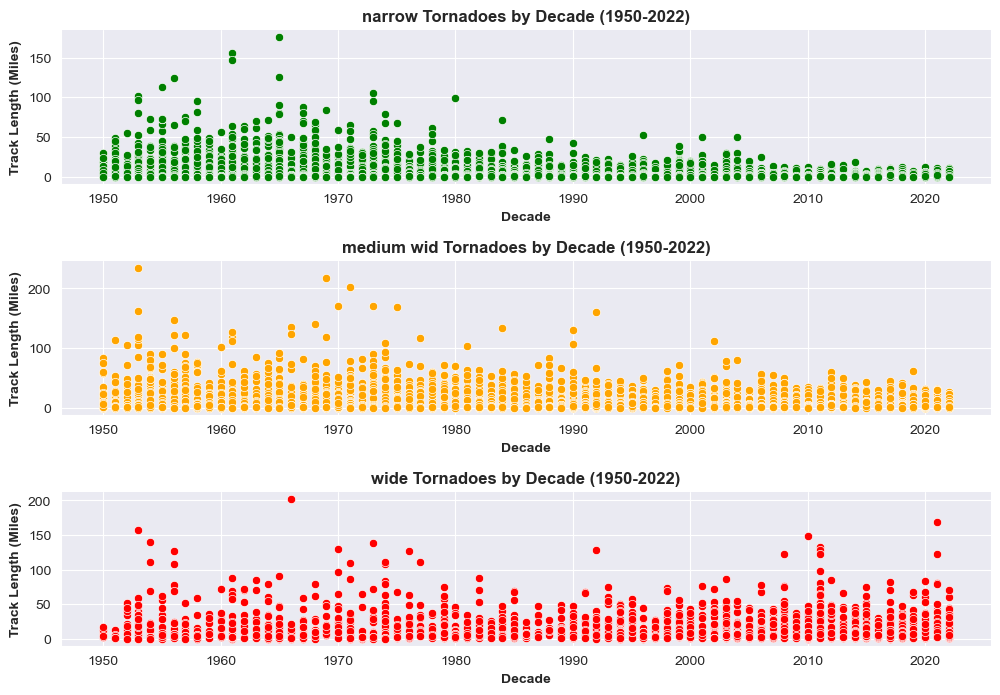

In [52]:
f, ax = plt.subplots(3, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine()
sns.scatterplot(x='yr', y='len', data=low_wid, color='Green', ax=ax[0])
ax[0].set_title('narrow Tornadoes by Decade (1950-2022)', weight='bold')
ax[0].set_xlabel('Decade', weight='bold')
ax[0].set_ylabel('Track Length (Miles)', weight='bold')

sns.scatterplot(x='yr', y='len', data=med_wid, color='Orange', ax=ax[1])
ax[1].set_title('medium wid Tornadoes by Decade (1950-2022)', weight='bold')
ax[1].set_xlabel('Decade', weight='bold')
ax[1].set_ylabel('Track Length (Miles)', weight='bold')

sns.scatterplot(x='yr', y='len', data=high_wid, color='Red', ax=ax[2])
ax[2].set_title('wide Tornadoes by Decade (1950-2022)', weight='bold')
ax[2].set_xlabel('Decade', weight='bold')
ax[2].set_ylabel('Track Length (Miles)', weight='bold')

Text(0, 0.5, 'Width (Yards)')

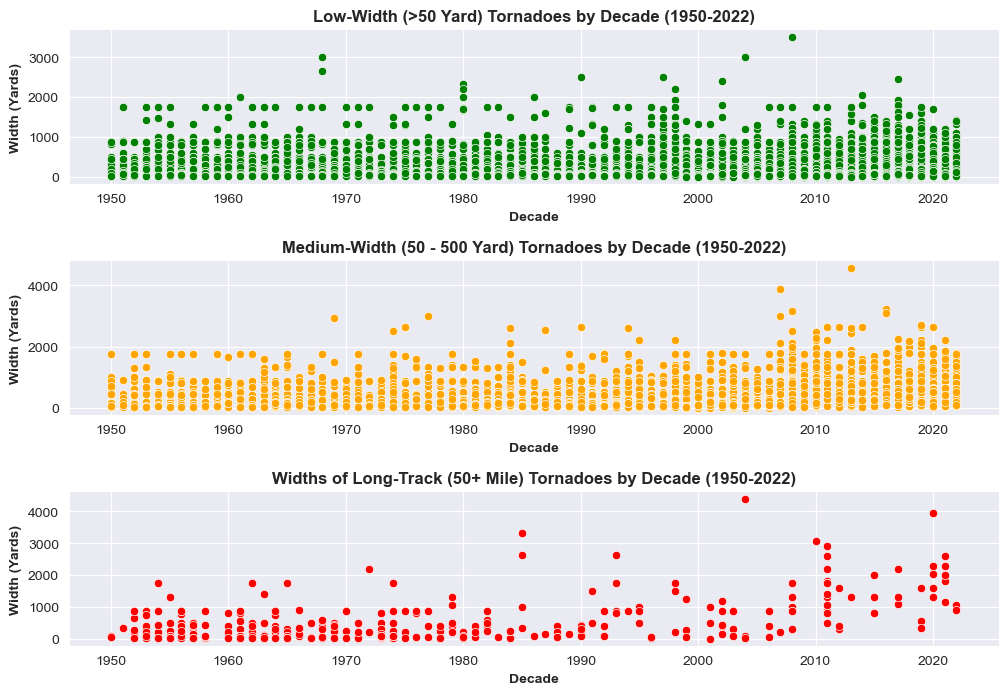

In [53]:
f, ax = plt.subplots(3, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine()
sns.scatterplot(x='yr', y='wid', data=low_len, color='green', ax=ax[0])
ax[0].set_title('Low-Width (>50 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax[0].set_xlabel('Decade', weight='bold')
ax[0].set_ylabel('Width (Yards)', weight='bold')

sns.scatterplot(x='yr', y='wid', data=med_len, color='orange', ax=ax[1])
ax[1].set_title('Medium-Width (50 - 500 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax[1].set_xlabel('Decade', weight='bold')
ax[1].set_ylabel('Width (Yards)', weight='bold')

sns.scatterplot(x='yr', y='wid', data=high_len, color='red', ax=ax[2])
ax[2].set_title('Widths of Long-Track (50+ Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax[2].set_xlabel('Decade', weight='bold')
ax[2].set_ylabel('Width (Yards)', weight='bold')

Text(0, 0.5, 'Width (Yards)')

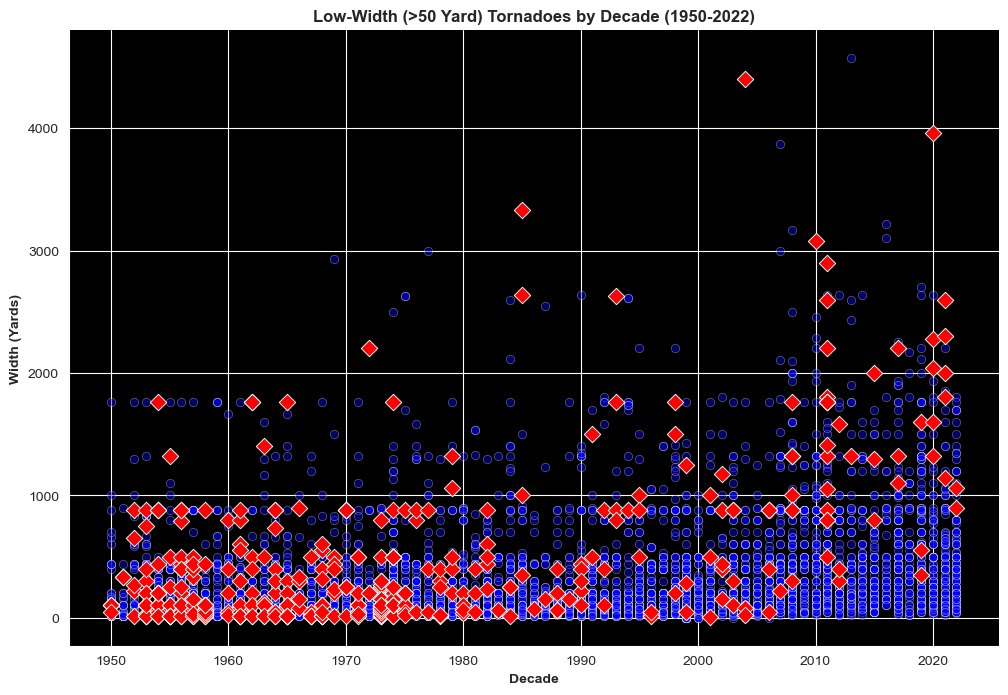

In [54]:
f, ax = plt.subplots(figsize=(12, 8))
sns.set_style('ticks')
sns.despine()
# Set background color
ax.set_facecolor('black')  # e.g., a light gray color
sns.scatterplot(x='yr', y='wid', data=med_len, color='blue', alpha=0.4)
sns.scatterplot(x='yr', y='wid', data=high_len, color='red', marker='D', s=70)
ax.set_title('Low-Width (>50 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax.set_xlabel('Decade', weight='bold')
ax.set_ylabel('Width (Yards)', weight='bold')

Text(0, 0.5, 'Width (Yards)')

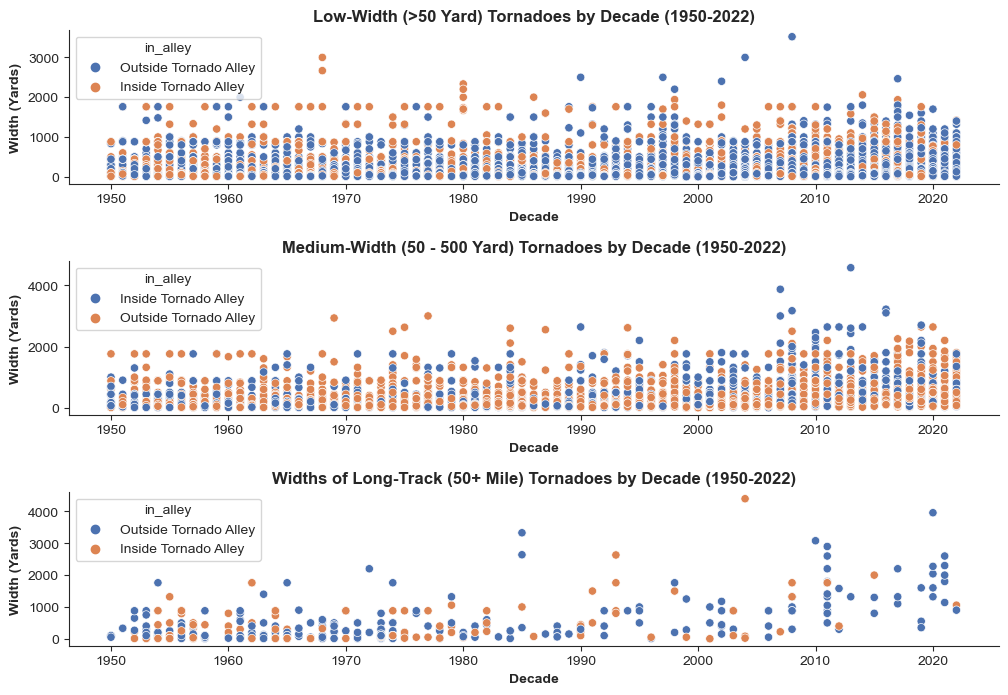

In [55]:
f, ax = plt.subplots(3, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine()
sns.scatterplot(x='yr', y='wid', hue='in_alley', data=low_len, palette='deep', ax=ax[0])
ax[0].set_title('Low-Width (>50 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax[0].set_xlabel('Decade', weight='bold')
ax[0].set_ylabel('Width (Yards)', weight='bold')

sns.scatterplot(x='yr', y='wid', hue='in_alley', data=med_len, palette='deep', ax=ax[1])
ax[1].set_title('Medium-Width (50 - 500 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax[1].set_xlabel('Decade', weight='bold')
ax[1].set_ylabel('Width (Yards)', weight='bold')

sns.scatterplot(x='yr', y='wid', hue='in_alley', data=high_len, palette='deep', ax=ax[2])
ax[2].set_title('Widths of Long-Track (50+ Mile) Tornadoes by Decade (1950-2022)', weight='bold')
ax[2].set_xlabel('Decade', weight='bold')
ax[2].set_ylabel('Width (Yards)', weight='bold')

Text(0, 0.5, 'Path (miles)')

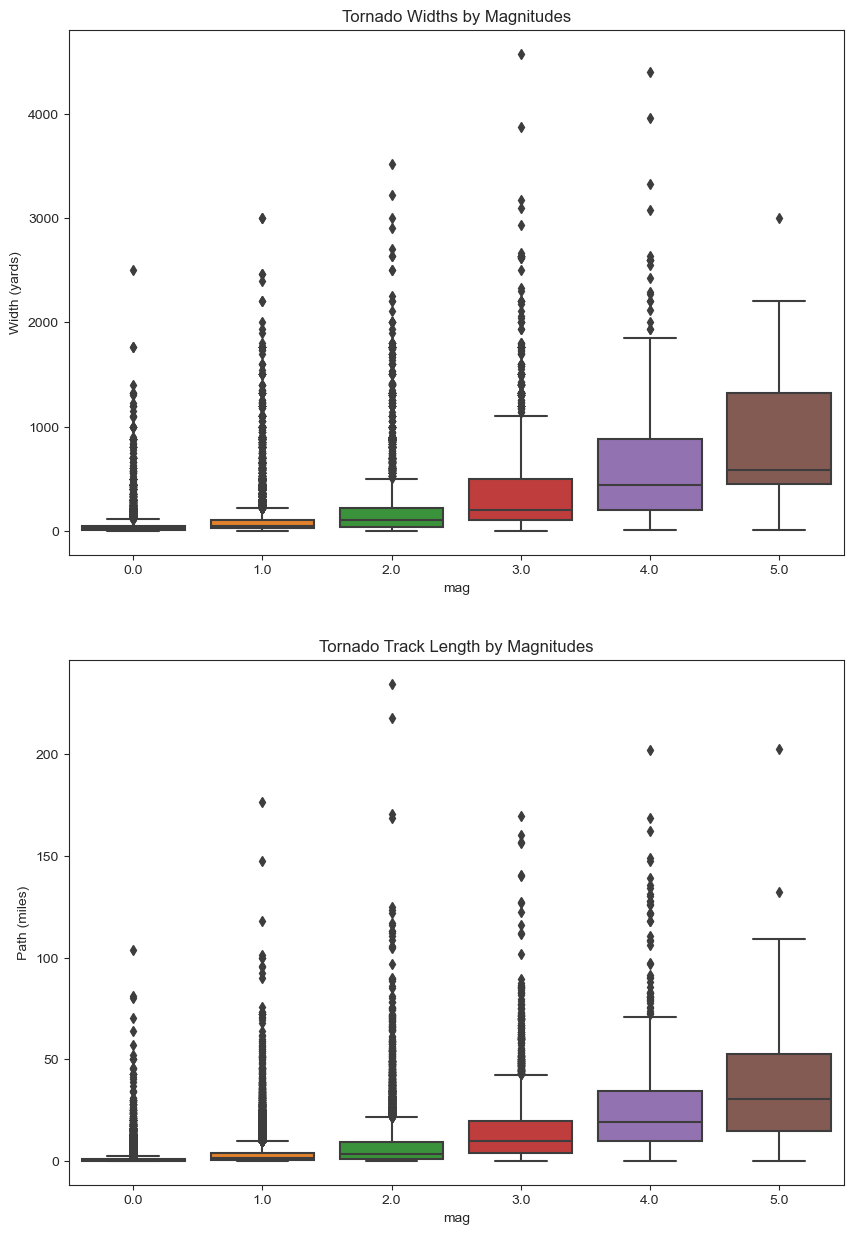

In [56]:
f, ax = plt.subplots(2, 1, figsize=(10, 15))
# Plot boxplot for len
sns.boxplot(x=tornadoes['mag'], y=tornadoes['wid'], ax=ax[0])
ax[0].set_title('Tornado Widths by Magnitudes')
ax[0].set_ylabel('Width (yards)')

sns.boxplot(x=tornadoes['mag'], y=tornadoes['len'], ax=ax[1])
ax[1].set_title('Tornado Track Length by Magnitudes')
ax[1].set_ylabel('Path (miles)')

Text(0, 0.5, 'Fatalities')

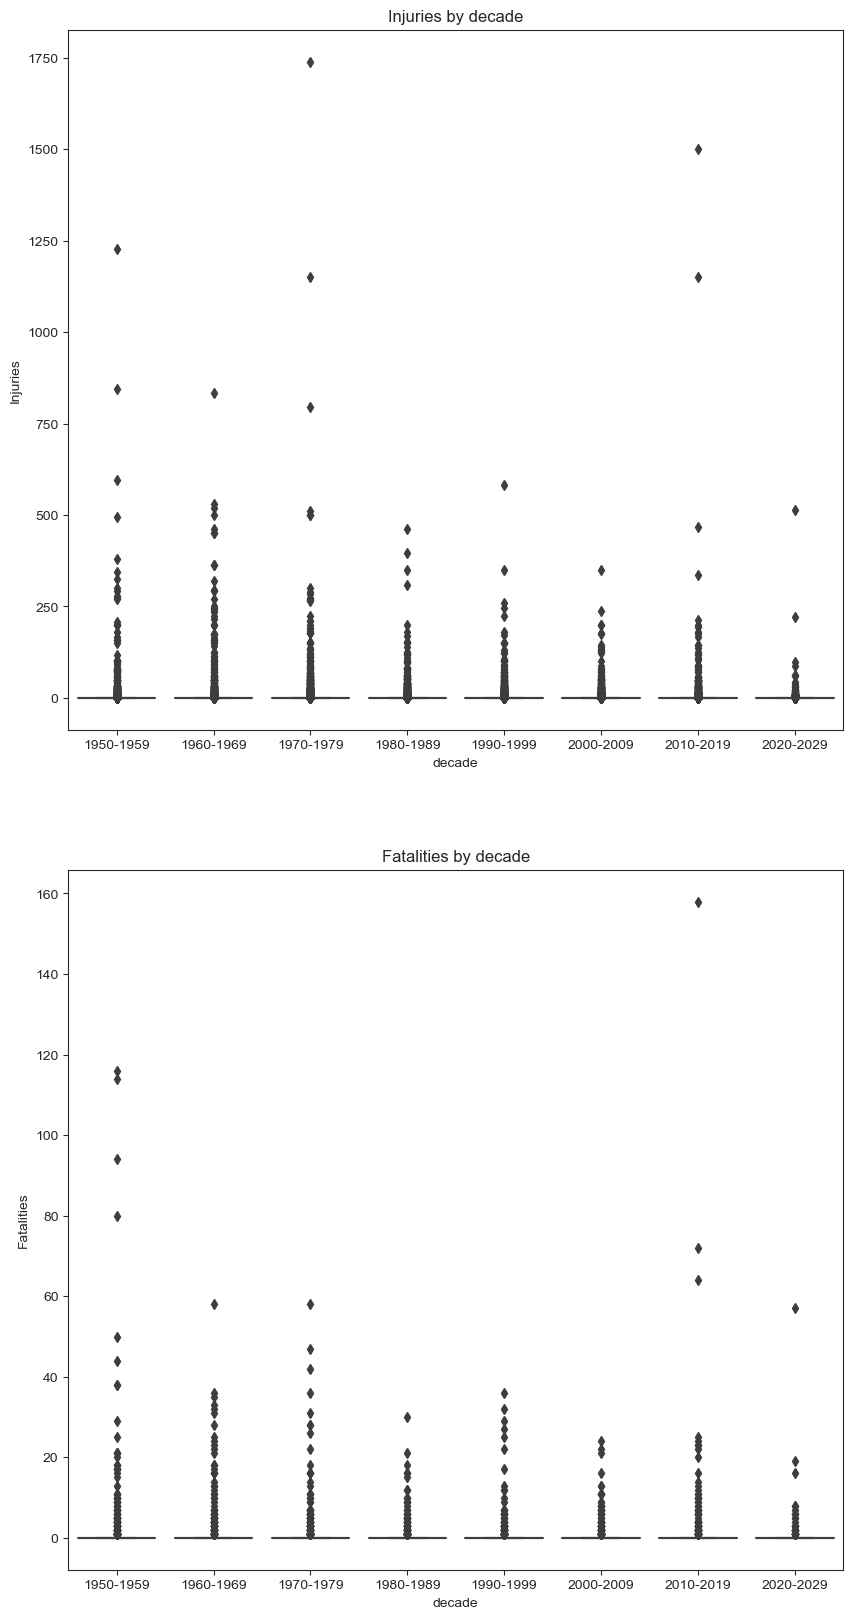

In [58]:
f, ax = plt.subplots(2, 1, figsize=(10, 20))
# Plot boxplot for len
sns.boxplot(x=tornadoes['decade'], y=tornadoes['inj'], ax=ax[0])
ax[0].set_title('Injuries by decade')
ax[0].set_ylabel('Injuries')

sns.boxplot(x=tornadoes['decade'], y=tornadoes['fat'], ax=ax[1])
ax[1].set_title('Fatalities by decade')
ax[1].set_ylabel('Fatalities')

In [59]:
# Group by year and get the count of each wid category tornadoes for each year
low_wid_counts = low_wid.groupby('yr').size().reset_index(name='count')
med_wid_counts = med_wid.groupby('yr').size().reset_index(name='count')
high_wid_counts = high_wid.groupby('yr').size().reset_index(name='count')

In [60]:
# Group by year and get the count of each wid category tornadoes for each year
low_wid_counts2 = low_wid.groupby(['yr', 'in_alley']).size().reset_index(name='count')
med_wid_counts2 = med_wid.groupby(['yr', 'in_alley']).size().reset_index(name='count')
high_wid_counts2 = high_wid.groupby(['yr', 'in_alley']).size().reset_index(name='count')

low_wid_counts2 = low_wid_counts2.pivot(index='yr', columns='in_alley', values='count').reset_index()
med_wid_counts2 = med_wid_counts2.pivot(index='yr', columns='in_alley', values='count').reset_index()
high_wid_counts2 = high_wid_counts2.pivot(index='yr', columns='in_alley', values='count').reset_index()

low_wid_counts2.columns.name = None 
med_wid_counts2.columns.name = None 
high_wid_counts2.columns.name = None 

In [61]:
# Group by year and get the count of each wid category tornadoes for each year
low_len_counts = low_len.groupby('yr').size().reset_index(name='count')
med_len_counts = med_len.groupby('yr').size().reset_index(name='count')
high_len_counts = high_len.groupby('yr').size().reset_index(name='count')
high_len_counts

yr  count
0   1950      4
1   1951      2
2   1952      5
3   1953     13
4   1954     13
..   ...    ...
60  2017      3
61  2019      3
62  2020      5
63  2021      5
64  2022      2

[65 rows x 2 columns]

In [62]:
# Group by year and get the count of each wid category tornadoes for each year
low_len_counts2 = low_len.groupby(['yr', 'in_alley']).size().reset_index(name='count')
med_len_counts2 = med_len.groupby(['yr', 'in_alley']).size().reset_index(name='count')
high_len_counts2 = high_len.groupby(['yr', 'in_alley']).size().reset_index(name='count')

low_len_counts2 = low_len_counts2.pivot(index='yr', columns='in_alley', values='count').reset_index()
med_len_counts2 = med_len_counts2.pivot(index='yr', columns='in_alley', values='count').reset_index()
high_len_counts2 = high_len_counts2.pivot(index='yr', columns='in_alley', values='count').reset_index()

low_len_counts2.columns.name = None 
med_len_counts2.columns.name = None 
high_len_counts2.columns.name = None 
low_len_counts2

yr  Inside Tornado Alley  Outside Tornado Alley
0   1950                    66                     93
1   1951                   140                     86
2   1952                    71                    121
3   1953                   161                    176
4   1954                   214                    254
..   ...                   ...                    ...
68  2018                   246                    814
69  2019                   367                    841
70  2020                   181                    704
71  2021                   207                    786
72  2022                   226                    653

[73 rows x 3 columns]

Text(0, 0.5, 'Frequency')

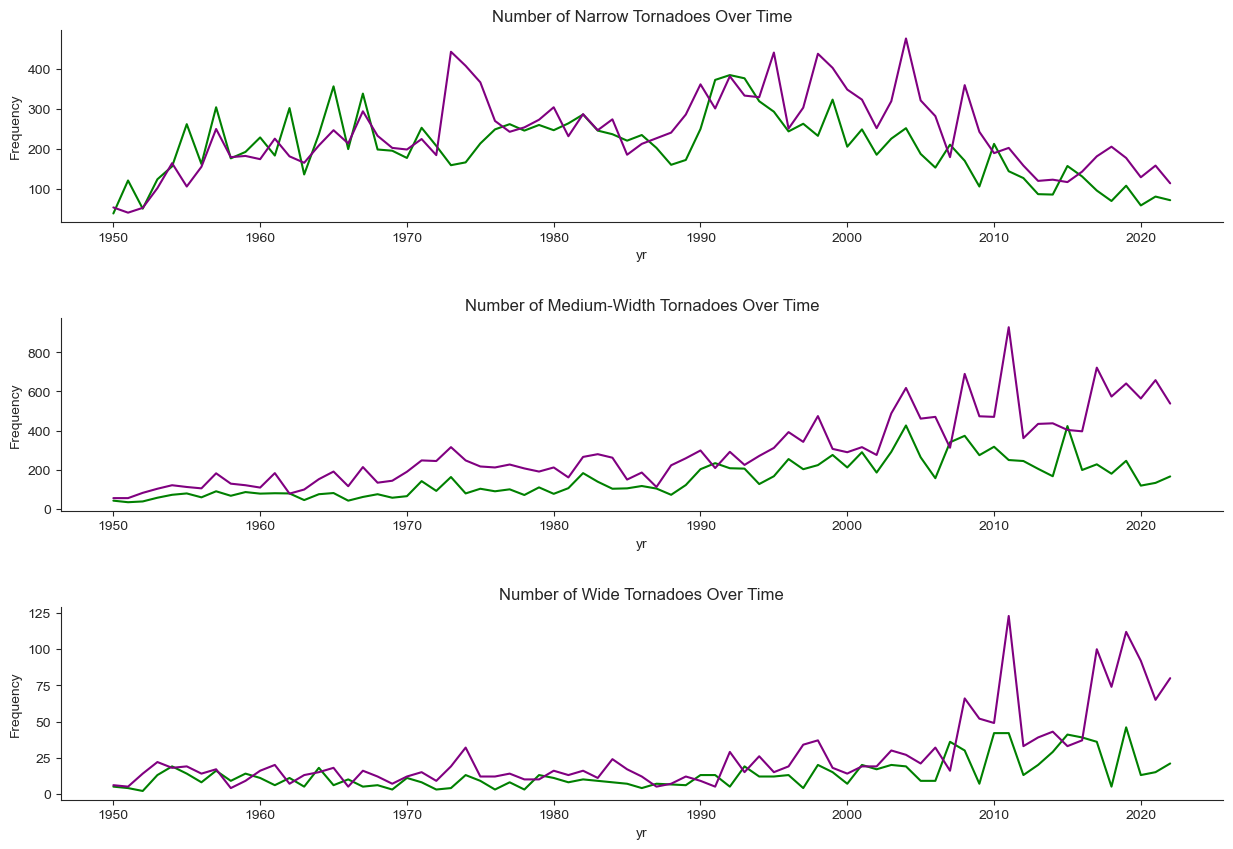

In [63]:
# Plotting
f, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine(f)
sns.lineplot(x='yr', y='Inside Tornado Alley', data=low_wid_counts2, ax=ax[0], color='green')
sns.lineplot(x='yr', y='Outside Tornado Alley', data=low_wid_counts2, ax=ax[0], color='purple')
ax[0].set_title('Number of Narrow Tornadoes Over Time')
ax[0].set_ylabel('Frequency')

sns.lineplot(x='yr', y='Inside Tornado Alley', data=med_wid_counts2, ax=ax[1], color='green')
sns.lineplot(x='yr', y='Outside Tornado Alley', data=med_wid_counts2, ax=ax[1], color='purple')
ax[1].set_title('Number of Medium-Width Tornadoes Over Time')
ax[1].set_ylabel('Frequency')

sns.lineplot(x='yr', y='Inside Tornado Alley', data=high_wid_counts2, ax=ax[2], color='green')
sns.lineplot(x='yr', y='Outside Tornado Alley', data=high_wid_counts2, ax=ax[2], color='purple')
ax[2].set_title('Number of Wide Tornadoes Over Time')
ax[2].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

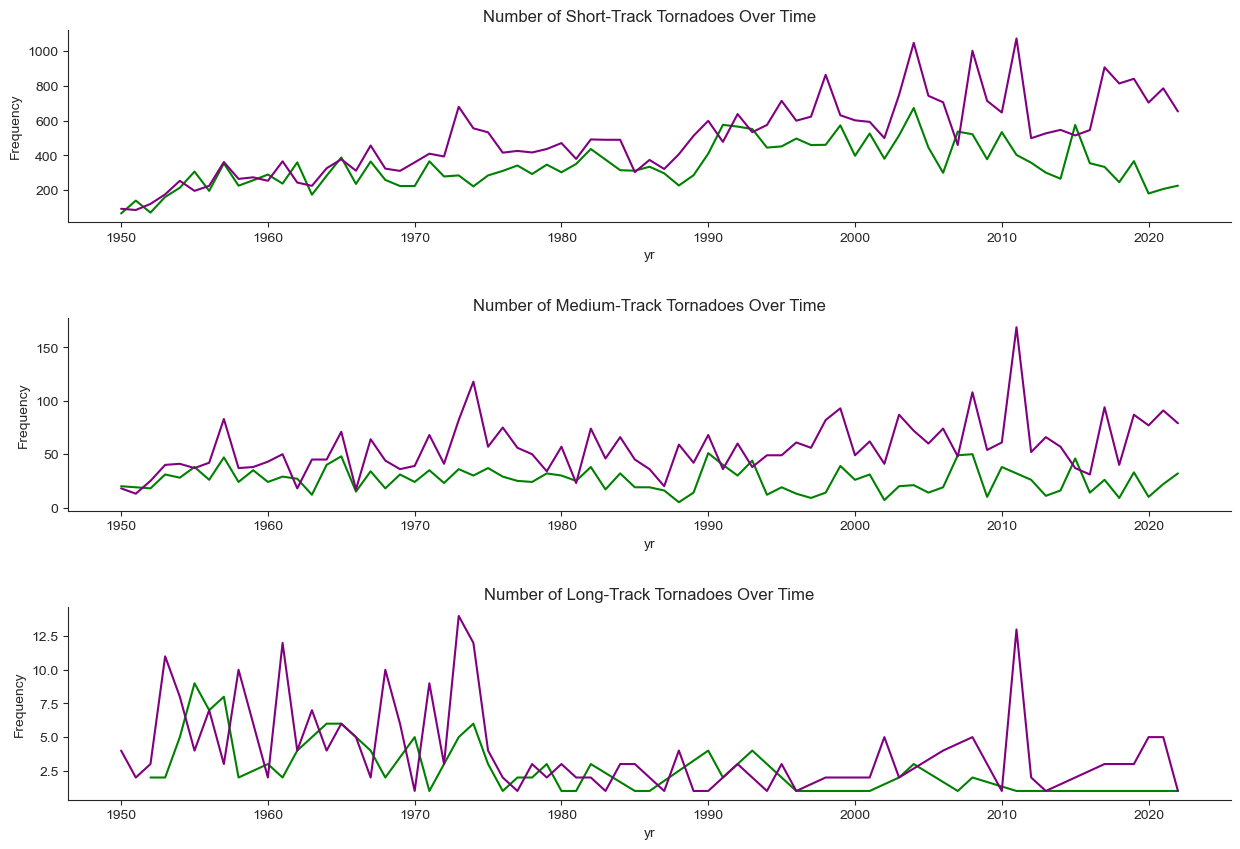

In [64]:
# Plotting
f, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine(f)
sns.lineplot(x='yr', y='Inside Tornado Alley', data=low_len_counts2, ax=ax[0], color='green')
sns.lineplot(x='yr', y='Outside Tornado Alley', data=low_len_counts2, ax=ax[0], color='purple')
ax[0].set_title('Number of Short-Track Tornadoes Over Time')
ax[0].set_ylabel('Frequency')

sns.lineplot(x='yr', y='Inside Tornado Alley', data=med_len_counts2, ax=ax[1], color='green')
sns.lineplot(x='yr', y='Outside Tornado Alley', data=med_len_counts2, ax=ax[1], color='purple')
ax[1].set_title('Number of Medium-Track Tornadoes Over Time')
ax[1].set_ylabel('Frequency')

sns.lineplot(x='yr', y='Inside Tornado Alley', data=high_len_counts2, ax=ax[2], color='green')
sns.lineplot(x='yr', y='Outside Tornado Alley', data=high_len_counts2, ax=ax[2], color='purple')
ax[2].set_title('Number of Long-Track Tornadoes Over Time')
ax[2].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

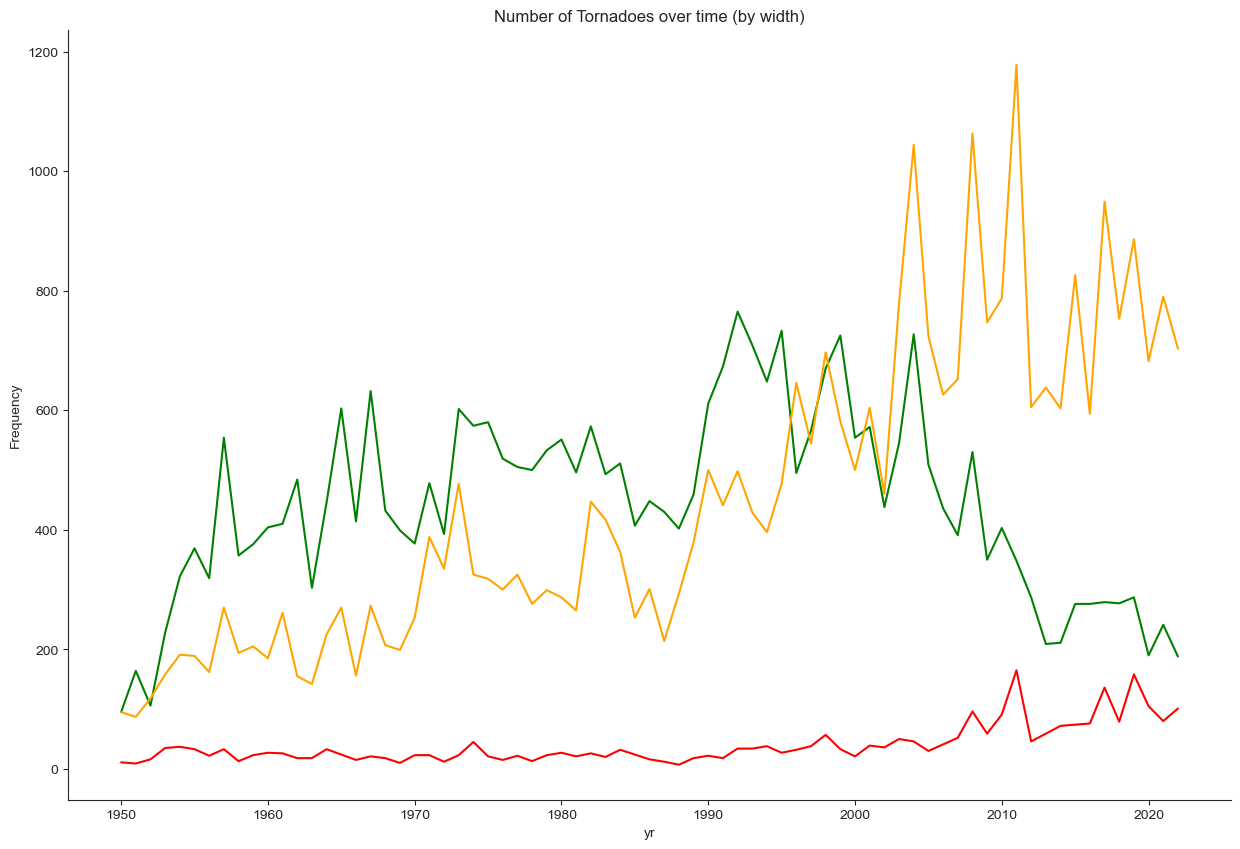

In [65]:
# Plotting
f, ax = plt.subplots(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine(f)
sns.lineplot(x='yr', y='count', data=low_wid_counts, ax=ax, color='green')
sns.lineplot(x='yr', y='count', data=med_wid_counts, ax=ax, color='orange')
sns.lineplot(x='yr', y='count', data=high_wid_counts, ax=ax, color='red')
ax.set_title('Number of Tornadoes over time (by width)')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Number of Long-Track Tornadoes')

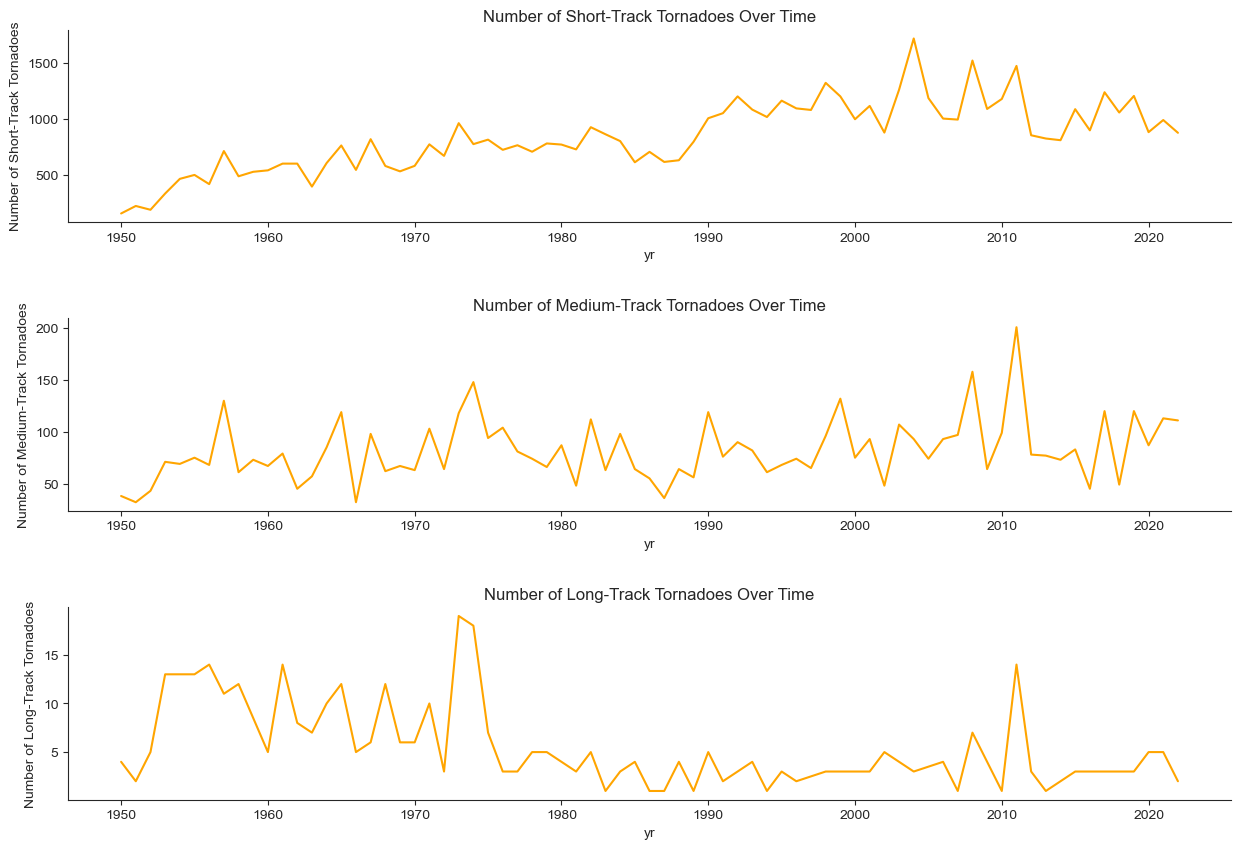

In [66]:
# Plotting
f, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine(f)
sns.lineplot(x='yr', y='count', data=low_len_counts, ax=ax[0], color='orange')
ax[0].set_title('Number of Short-Track Tornadoes Over Time')
ax[0].set_ylabel('Number of Short-Track Tornadoes')

sns.lineplot(x='yr', y='count', data=med_len_counts, ax=ax[1], color='orange')
ax[1].set_title('Number of Medium-Track Tornadoes Over Time')
ax[1].set_ylabel('Number of Medium-Track Tornadoes')

sns.lineplot(x='yr', y='count', data=high_len_counts, ax=ax[2], color='orange')
ax[2].set_title('Number of Long-Track Tornadoes Over Time')
ax[2].set_ylabel('Number of Long-Track Tornadoes')

Text(0, 0.5, 'Frequency')

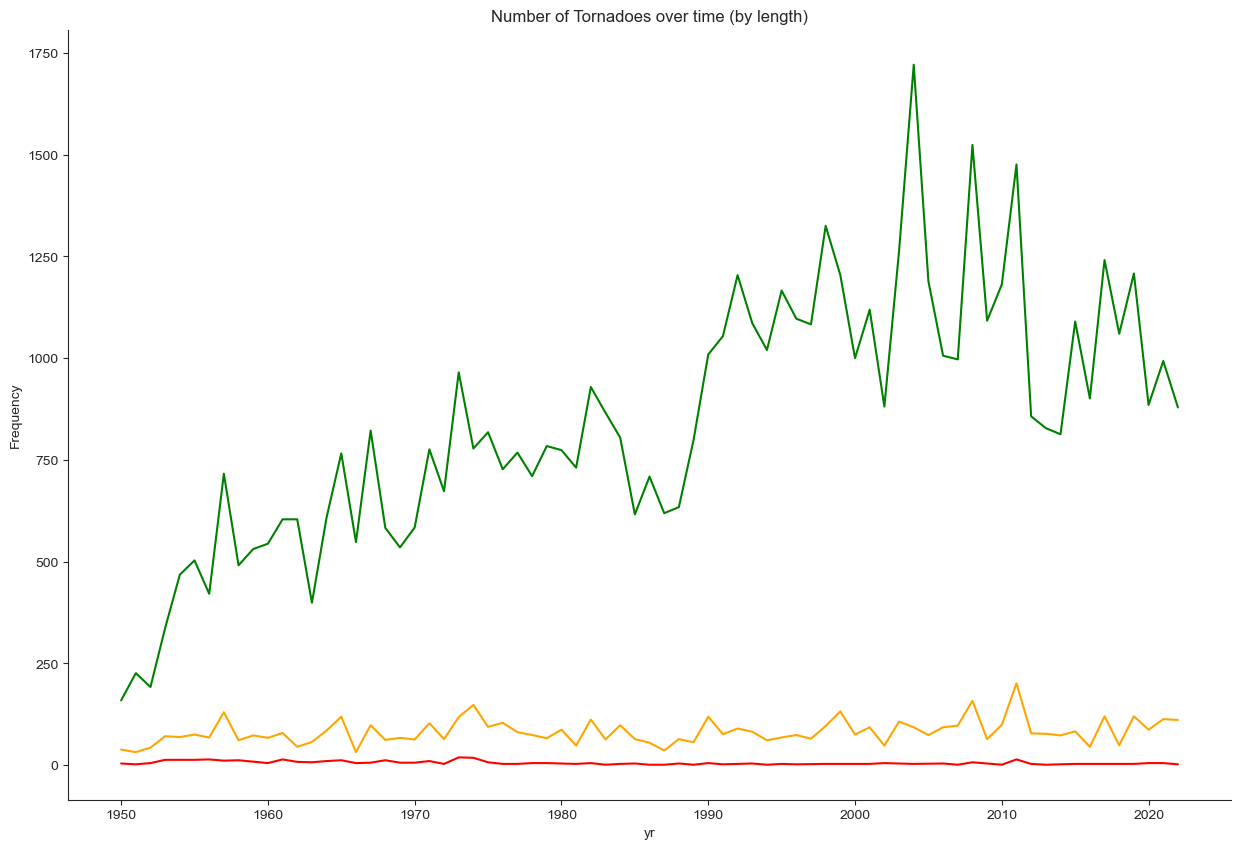

In [67]:
# Plotting
f, ax = plt.subplots(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine(f)
sns.lineplot(x='yr', y='count', data=low_len_counts, ax=ax, color='green')
sns.lineplot(x='yr', y='count', data=med_len_counts, ax=ax, color='orange')
sns.lineplot(x='yr', y='count', data=high_len_counts, ax=ax, color='red')
ax.set_title('Number of Tornadoes over time (by length)')
ax.set_ylabel('Frequency')

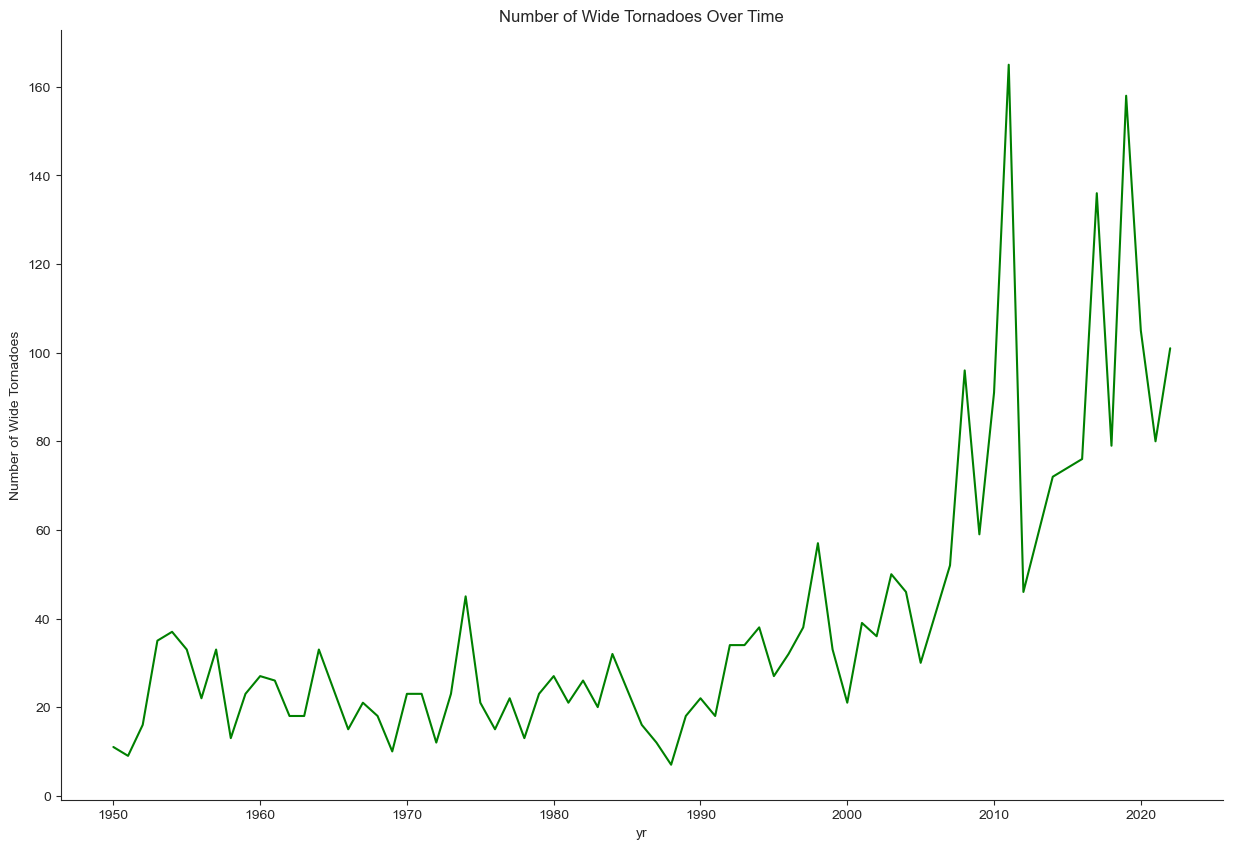

In [70]:
# Plotting
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f)
sns.lineplot(x='yr', y='count', data=high_wid_counts, ax=ax, color='green')
ax.set_title('Number of Wide Tornadoes Over Time')
ax.set_ylabel('Number of Wide Tornadoes')
plt.show()

ValueError: Could not interpret value `Outside Alley Counts` for parameter `y`

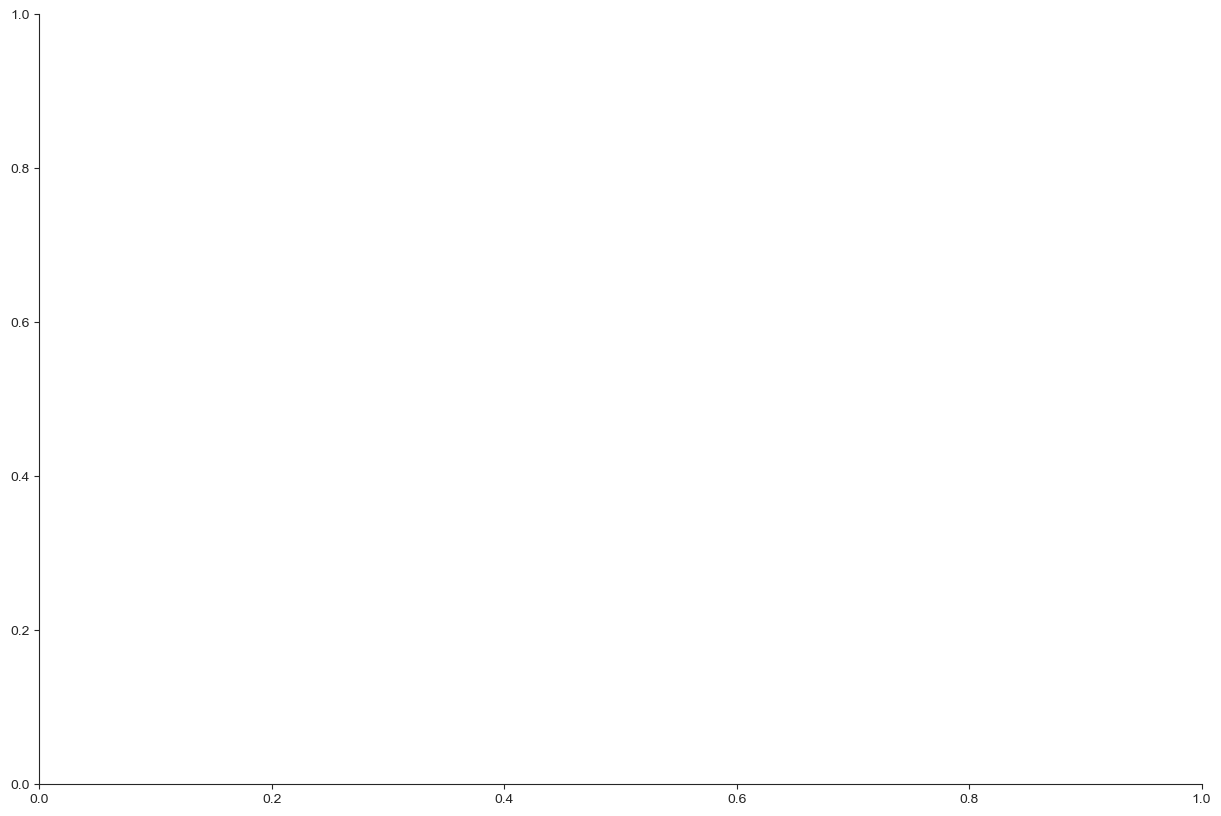

In [75]:
# Plotting
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f)
sns.scatterplot(x='yr', y='Outside Alley Counts', data=high_wid_counts2, ax=ax, color='green')
ax.set_title('Number of Wide Tornadoes Over Time')
ax.set_ylabel('Number of Wide Tornadoes')
plt.show()

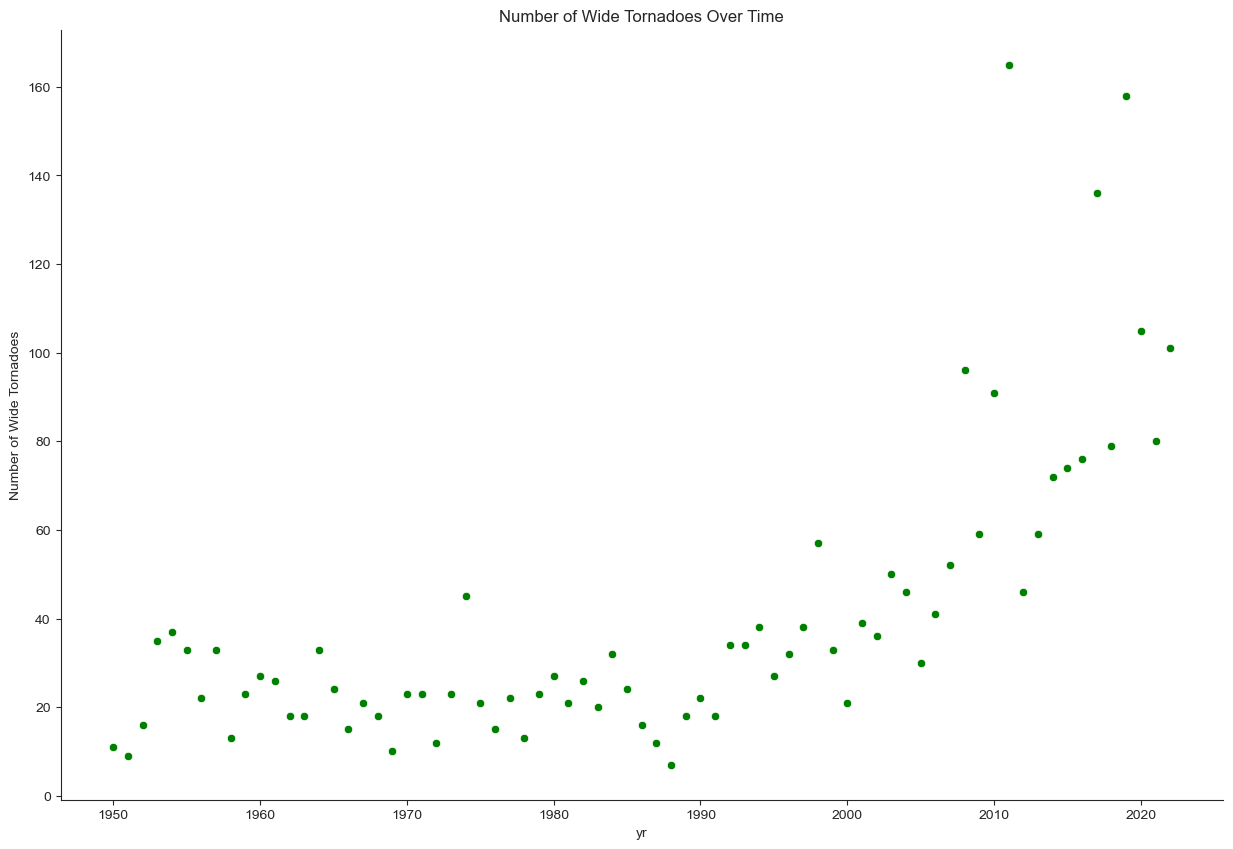

In [74]:
# Plotting
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f)
sns.scatterplot(x='yr', y='count', data=high_wid_counts, ax=ax, color='green')
ax.set_title('Number of Wide Tornadoes Over Time')
ax.set_ylabel('Number of Wide Tornadoes')
plt.show()

In [76]:
corr_matrix = tornadoes.corr(numeric_only=True)
corr_matrix

om        yr        mo        dy       stf       mag       inj  \
om    1.000000  0.633526 -0.007380  0.040975 -0.042606 -0.080530 -0.018502   
yr    0.633526  1.000000  0.008544  0.027040 -0.061580 -0.281710 -0.041970   
mo   -0.007380  0.008544  1.000000 -0.044182  0.010388 -0.048903 -0.023312   
dy    0.040975  0.027040 -0.044182  1.000000  0.004058 -0.011815 -0.009894   
stf  -0.042606 -0.061580  0.010388  0.004058  1.000000 -0.016821 -0.012691   
mag  -0.080530 -0.281710 -0.048903 -0.011815 -0.016821  1.000000  0.220756   
inj  -0.018502 -0.041970 -0.023312 -0.009894 -0.012691  0.220756  1.000000   
fat  -0.009104 -0.032970 -0.023830 -0.004683 -0.010963  0.195581  0.761648   
slat -0.013402  0.003490  0.066610  0.000580  0.100762 -0.022323 -0.010729   
slon  0.077602  0.060632  0.031729 -0.013019 -0.126667  0.125670  0.031139   
elat  0.370297  0.582699 -0.011911  0.019557 -0.039198  0.060946  0.042733   
elon -0.371817 -0.590361  0.027963 -0.022987  0.049495 -0.049359 -0.039789   
len   0.013218 -0.056603 -0.053308 -0.006866 -0.037039  0.440819  0.256295   
wid   0.158655  0.122741 -0.068095  0.013133 -0.024800  0.420098  0.185366   
ns    0.027903  0.020952 -0.011998 -0.003400 -0.006277  0.126863  0.113806   
sn   -0.028444 -0.021427  0.012061  0.002430  0.005816 -0.127035 -0.114676   
f1   -0.020258 -0.031479 -0.049373  0.005350  0.260427 -0.011029 -0.013521   
f2    0.037259  0.006832 -0.035134 -0.004950  0.009672  0.217811  0.077041   
f3    0.003325 -0.026715 -0.028826  0.000220 -0.010709  0.156937  0.099509   
f4   -0.006814 -0.026097 -0.023662 -0.000053 -0.007422  0.104969  0.078883   
fc   -0.081256 -0.220734  0.017819 -0.001766  0.009029 -0.047970 -0.012512   

           fat      slat      slon  ...      elon       len       wid  \
om   -0.009104 -0.013402  0.077602  ... -0.371817  0.013218  0.158655   
yr   -0.032970  0.003490  0.060632  ... -0.590361 -0.056603  0.122741   
mo   -0.023830  0.066610  0.031729  ...  0.027963 -0.053308 -0.068095   
dy   -0.004683  0.000580 -0.013019  ... -0.022987 -0.006866  0.013133   
stf  -0.010963  0.100762 -0.126667  ...  0.049495 -0.037039 -0.024800   
mag   0.195581 -0.022323  0.125670  ... -0.049359  0.440819  0.420098   
inj   0.761648 -0.010729  0.031139  ... -0.039789  0.256295  0.185366   
fat   1.000000 -0.010803  0.021543  ... -0.035844  0.237260  0.174018   
slat -0.010803  1.000000 -0.175746  ... -0.040669 -0.003045 -0.034842   
slon  0.021543 -0.175746  1.000000  ...  0.038709  0.050902  0.059471   
elat  0.037074  0.180595  0.046085  ... -0.972440  0.279004  0.222909   
elon -0.035844 -0.040669  0.038709  ...  1.000000 -0.274358 -0.227590   
len   0.237260 -0.003045  0.050902  ... -0.274358  1.000000  0.378085   
wid   0.174018 -0.034842  0.059471  ... -0.227590  0.378085  1.000000   
ns    0.112414  0.004399  0.026608  ... -0.068224  0.254484  0.136807   
sn   -0.114427 -0.004394 -0.026940  ...  0.068875 -0.253851 -0.138142   
f1   -0.009891 -0.232007 -0.099619  ...  0.024071 -0.033011 -0.006290   
f2    0.055869 -0.024402  0.030120  ... -0.162014  0.365211  0.188183   
f3    0.084548 -0.013920  0.016164  ... -0.075713  0.408666  0.149714   
f4    0.064739 -0.007966  0.007510  ... -0.042049  0.375264  0.110326   
fc   -0.009879  0.038156 -0.075457  ...  0.171734 -0.043847 -0.063427   

            ns        sn        f1        f2        f3        f4        fc  
om    0.027903 -0.028444 -0.020258  0.037259  0.003325 -0.006814 -0.081256  
yr    0.020952 -0.021427 -0.031479  0.006832 -0.026715 -0.026097 -0.220734  
mo   -0.011998  0.012061 -0.049373 -0.035134 -0.028826 -0.023662  0.017819  
dy   -0.003400  0.002430  0.005350 -0.004950  0.000220 -0.000053 -0.001766  
stf  -0.006277  0.005816  0.260427  0.009672 -0.010709 -0.007422  0.009029  
mag   0.126863 -0.127035 -0.011029  0.217811  0.156937  0.104969 -0.047970  
inj   0.113806 -0.114676 -0.013521  0.077041  0.099509  0.078883 -0.012512  
fat   0.112414 -0.114427 -0.009891  0.055869  0.084548  0.064739 -0.0098

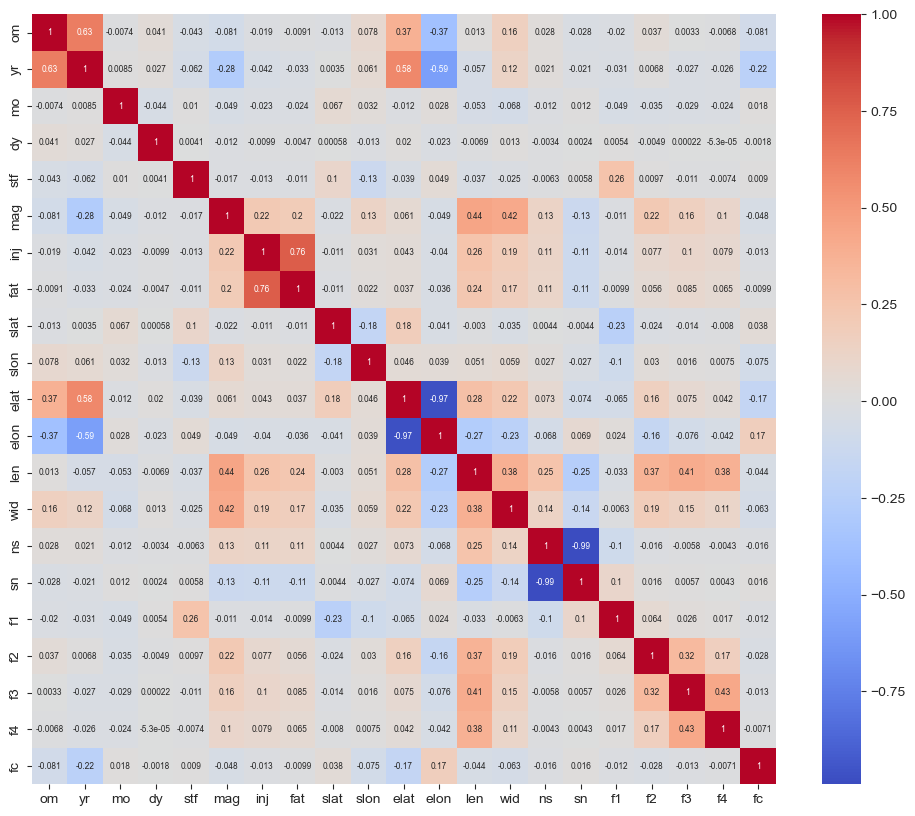

In [77]:
# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.show()

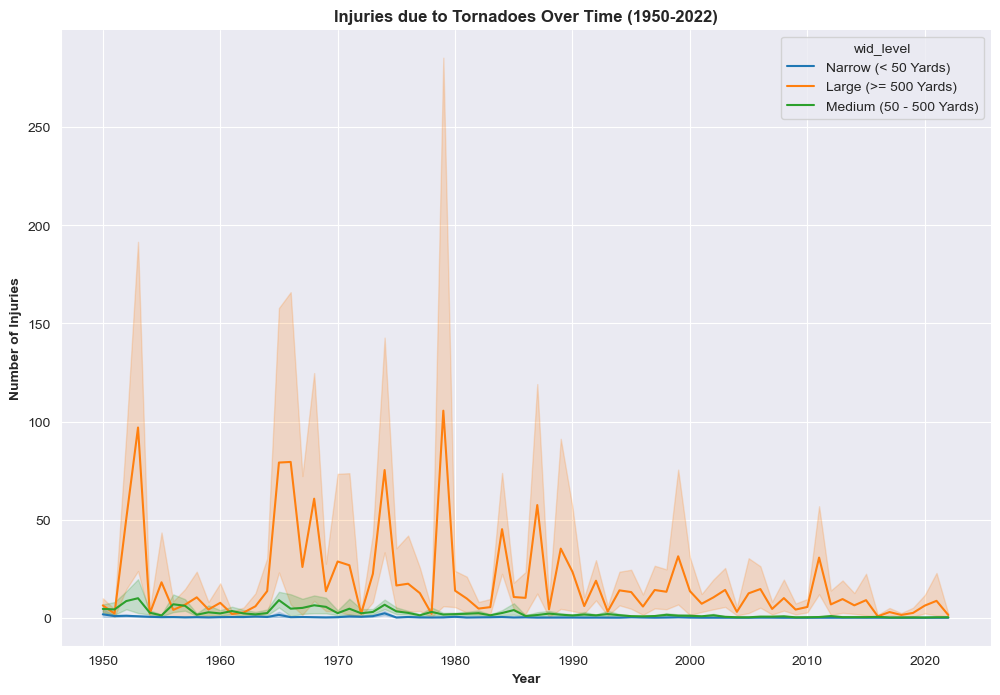

In [91]:
# Plotting
f, ax = plt.subplots(figsize=(12, 8))
sns.despine(f)
sns.lineplot(x='yr', y='inj', hue='wid_level', data=tornadoes)
ax.set_title('Injuries due to Tornadoes Over Time (1950-2022)', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Number of Injuries', weight='bold')
plt.show()

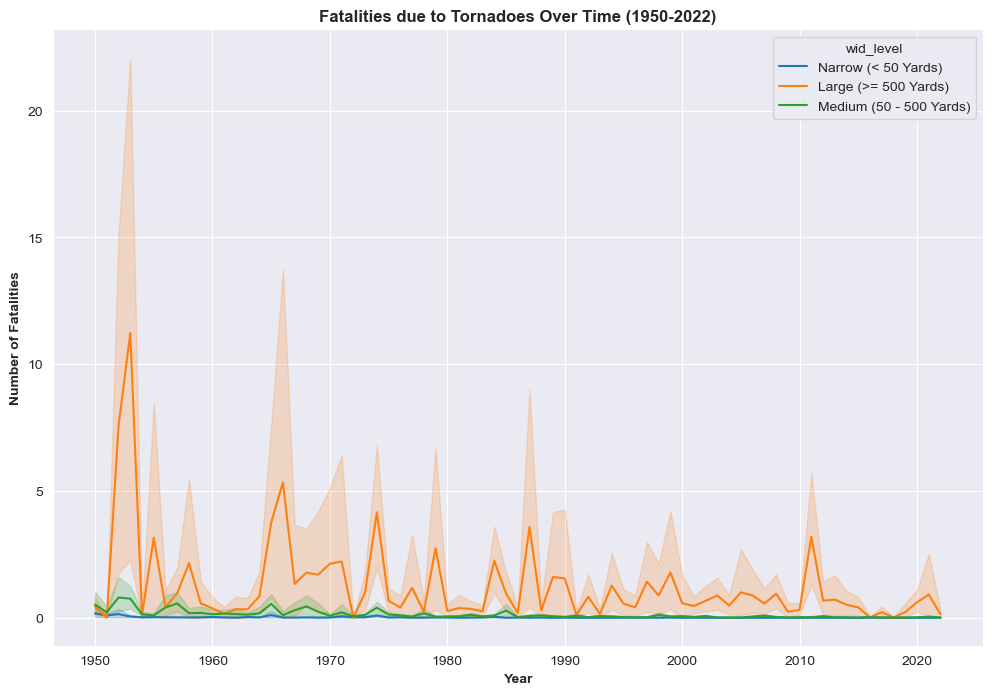

In [92]:
# Plotting
f, ax = plt.subplots(figsize=(12, 8))
sns.despine(f)
sns.lineplot(x='yr', y='fat', hue='wid_level', data=tornadoes)
ax.set_title('Fatalities due to Tornadoes Over Time (1950-2022)', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Number of Fatalities', weight='bold')
plt.show()

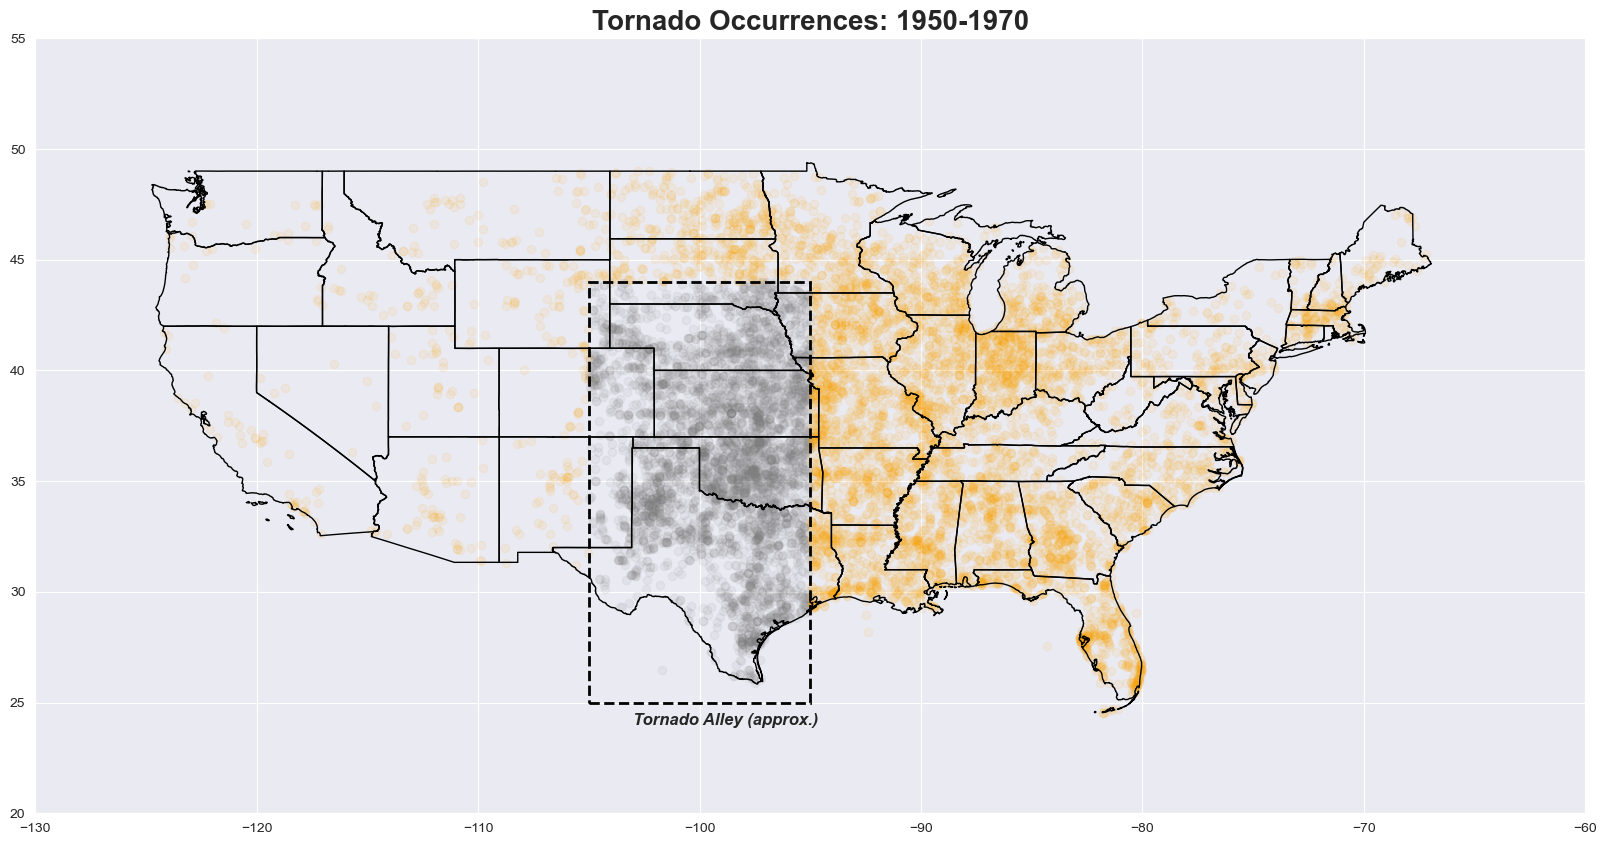

In [172]:
import geopandas as gpd
from shapely.geometry import Point
from matplotlib.patches import Rectangle
df2 = tornadoes.query("((decade == '1950-1959' | decade == '1960-1969') & in_alley == 'Inside Tornado Alley')")
df3 = tornadoes.query("((decade == '1950-1959' | decade == '1960-1969') & in_alley == 'Outside Tornado Alley')")


geometry2 = [Point(xy) for xy in zip(df2['slon'], df2['slat'])]
geometry3 = [Point(xy) for xy in zip(df3['slon'], df3['slat'])]


tornadoes_gdf_in = gpd.GeoDataFrame(df2, geometry=geometry2)
tornadoes_gdf_out = gpd.GeoDataFrame(df3, geometry=geometry3)

states_gdf = gpd.read_file('../gz_2010_us_040_00_5m.json')

f, ax = plt.subplots(figsize=(20, 15))
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black')  


tornadoes_gdf_in.plot(ax=ax, color='gray', alpha=0.08)
tornadoes_gdf_out.plot(ax=ax, color='orange', alpha=0.08)

# Add the bounding box for Tornado Alley
alley_box = Rectangle((-105, 25), 10, 19, fill=False, edgecolor='black', linewidth=2, linestyle='dashed')
ax.add_patch(alley_box)

# Add label to the box
label_x = -101  # center of the box in terms of longitude
label_y = 24  # slightly above the top boundary of the box
ax.text(-103, 24, 'Tornado Alley (approx.)', fontsize=12, weight='bold', style='italic')

ax.set_title('Tornado Occurrences: 1950-1970', fontsize=20, weight='bold')

ax.set_ylim(20, 55)
ax.set_xlim(-130, -60)
plt.show()

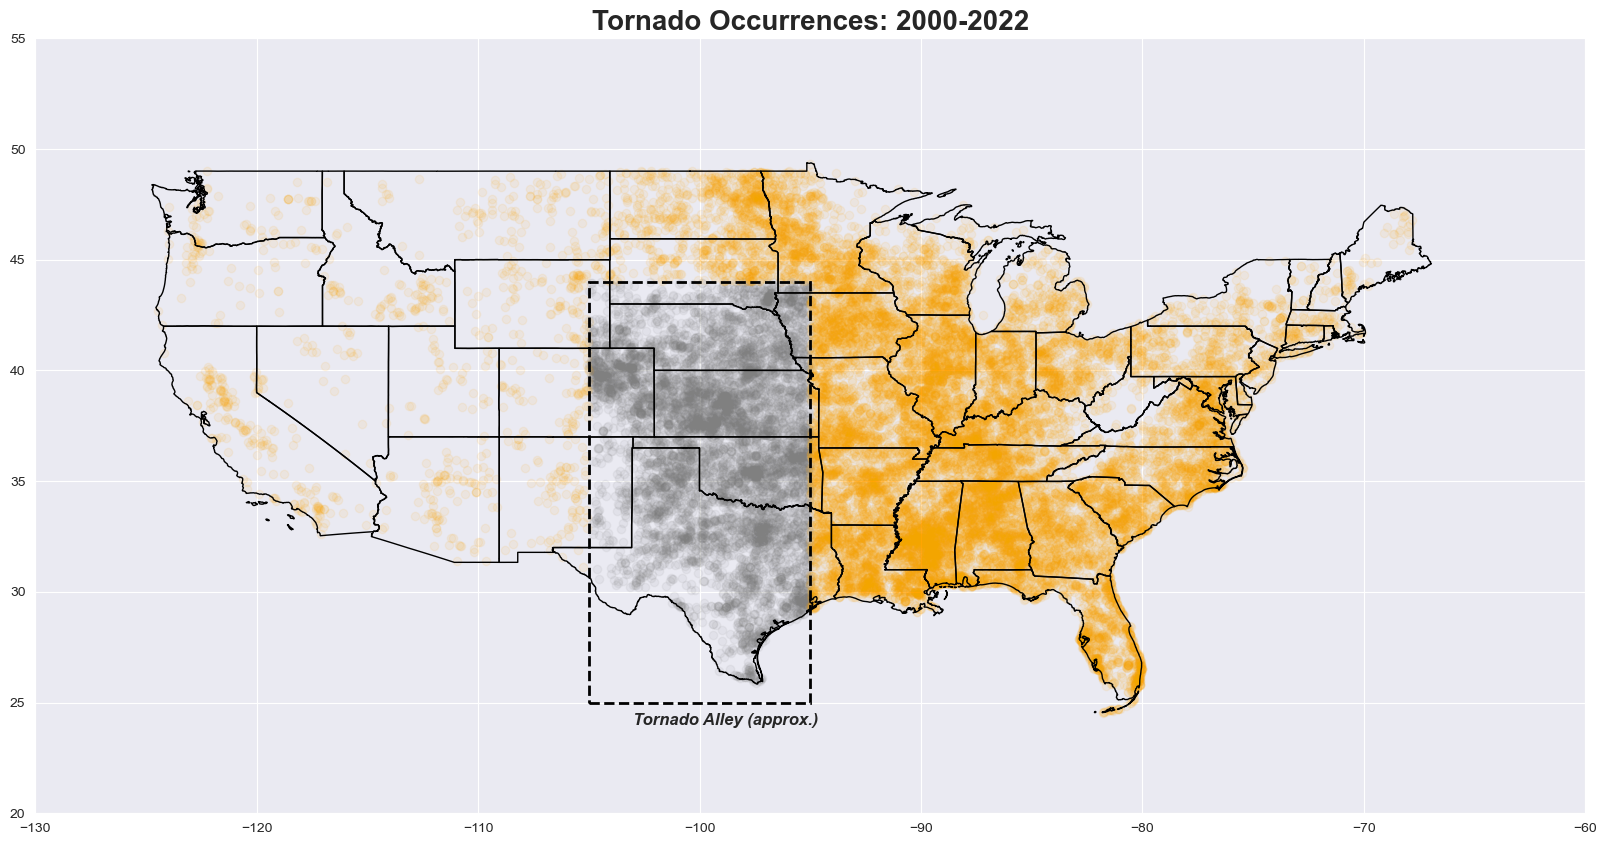

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [171]:
df2 = tornadoes.query("((decade == '2000-2009' | decade == '2010-2019' | decade == '2020-2029') & in_alley == 'Inside Tornado Alley')")
df3 = tornadoes.query("((decade == '2000-2009' | decade == '2010-2019' | decade == '2020-2029') & in_alley == 'Outside Tornado Alley')")


geometry2 = [Point(xy) for xy in zip(df2['slon'], df2['slat'])]
geometry3 = [Point(xy) for xy in zip(df3['slon'], df3['slat'])]


tornadoes_gdf_in = gpd.GeoDataFrame(df2, geometry=geometry2)
tornadoes_gdf_out = gpd.GeoDataFrame(df3, geometry=geometry3)

f, ax = plt.subplots(figsize=(20, 15))
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black')  


tornadoes_gdf_in.plot(ax=ax, color='gray', alpha=0.08)
tornadoes_gdf_out.plot(ax=ax, color='orange', alpha=0.08)

# Add the bounding box for Tornado Alley
alley_box = Rectangle((-105, 25), 10, 19, fill=False, edgecolor='black', linewidth=2, linestyle='dashed')
ax.add_patch(alley_box)

ax.text(-103, 24, 'Tornado Alley (approx.)', fontsize=12, weight='bold', style='italic')

ax.set_title('Tornado Occurrences: 2000-2022', fontsize=20, weight='bold')

ax.set_ylim(20, 55)
ax.set_xlim(-130, -60)
plt.show()
ax.legend()

Text(0, 0.5, 'Number of tornadoes')

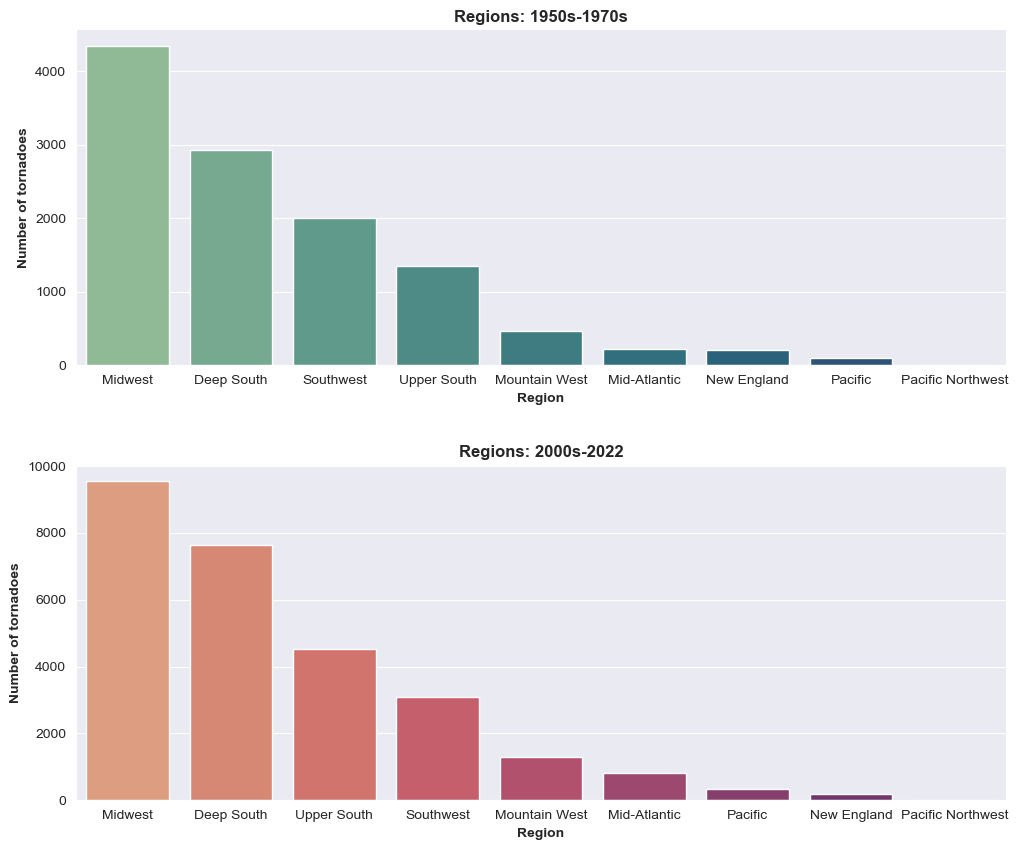

In [220]:
# Plotting and styles
sns.set_style('darkgrid')
f, ax = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.despine()

# Plot for 1950s
regions_early = tornadoes.query("decade == '1950-1959' | decade == '1960-1969'")
region_order_1950s = regions_early['region'].value_counts().index     # Specify descending order
sns.countplot(x="region", data=regions_early, palette='crest', order=region_order_1950s, ax=ax[0])
ax[0].set_title('Regions: 1950s-1970s', weight='bold')
ax[0].set_xlabel('Region', weight='bold')
ax[0].set_ylabel('Number of tornadoes', weight='bold')

# Plot for 2010s
regions_late = tornadoes.query("decade == '2000-2009' | decade == '2010-2019' | decade == '2020-2029'")
region_order_2010s = regions_late['region'].value_counts().index     # Specify descending order
sns.countplot(x="region", data=regions_late, palette='flare', order=region_order_2010s, ax=ax[1])
ax[1].set_title('Regions: 2000s-2022', weight='bold')
ax[1].set_xlabel('Region', weight='bold')
ax[1].set_ylabel('Number of tornadoes', weight='bold')

Text(0, 0.5, 'Number of tornadoes')

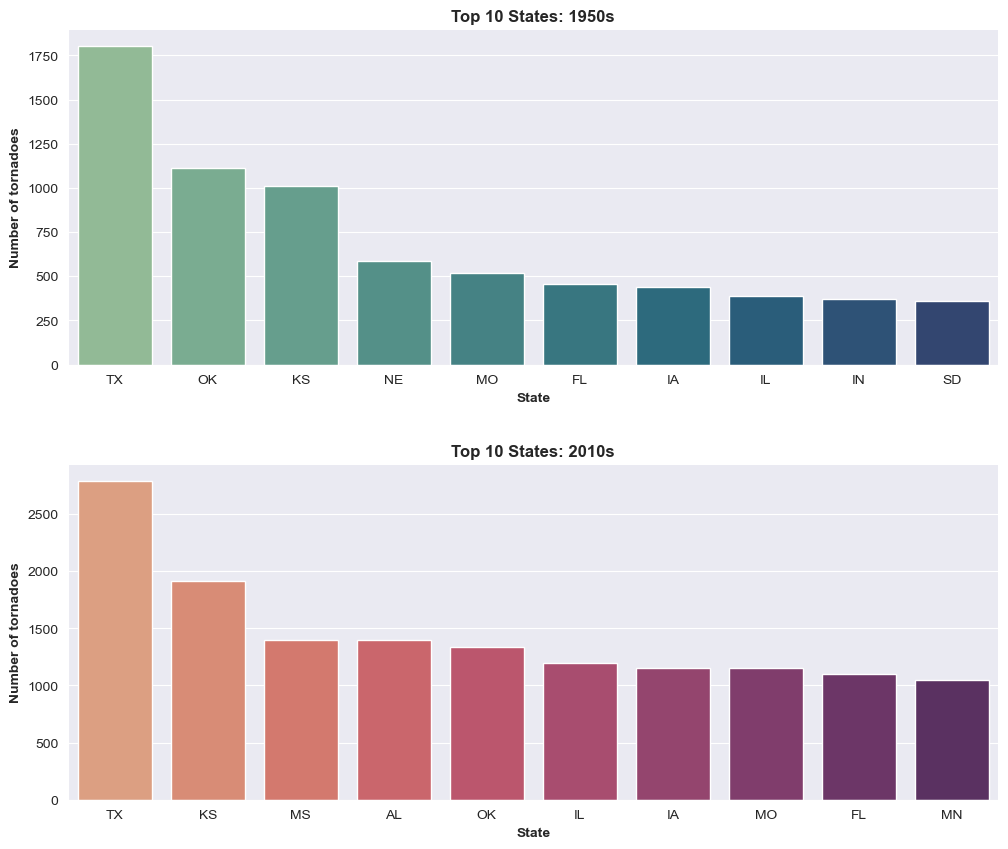

In [221]:
# Plotting and styles
sns.set_style('darkgrid')
f, ax = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.despine()

# Plot for 1950s-1970s
# Filter by top 10 states
states_early = tornadoes.query("decade == '1950-1959' | decade == '1960-1969'")
top_10_states_1950s = states_early['st'].value_counts().head(10).index
sns.countplot(x="st", data=states_early, palette='crest', order=top_10_states_1950s, ax=ax[0])
ax[0].set_title('Top 10 States: 1950s', weight='bold')
ax[0].set_xlabel('State', weight='bold')
ax[0].set_ylabel('Number of tornadoes', weight='bold')

# Plot for 2000s-2022
states_late = tornadoes.query("decade == '2000-2009' | decade == '2010-2019' | decade == '2020-2029'")
# Filter by top 10 states
top_10_states_2000s = states_late['st'].value_counts().head(10).index
# Plot for states
sns.countplot(x="st", data=states_late, palette='flare', order=top_10_states_2000s, ax=ax[1])
ax[1].set_title('Top 10 States: 2010s', weight='bold')
ax[1].set_xlabel('State', weight='bold')
ax[1].set_ylabel('Number of tornadoes', weight='bold')